In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
n = 10

In [ ]:
x = np.linspace(-1,1 ,n)


# VECTOR NORMS

## lp norm

$$
\|x\|_p =   (∑_i |x_i|^p)^\frac{1}{p}
$$

## Hölder's inequality
$$
|<x,y>| \leq \|x\|_p, \|y\|_q ,  \\
\frac{1}{p} + \frac{1}{q} = 1
$$

## Equivalence
$$
\|x\|_2 \leq \|x\|_1 \leq \sqrt{n} \|x\|_2  \\
\|x\|_{∞} \leq \|x\|_2 \leq \sqrt{n} \|x\|_{∞} \\
\|x\|_{∞} \leq \|x\|_1 \leq n \|x\|_{∞}
$$

In [ ]:
def get_cmap(n, name='hsv'):
    return plt.cm.get_cmap(name, n)

<ipython-input-3-77c3a55f1b06>:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  return plt.cm.get_cmap(name, n)


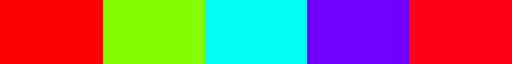

In [ ]:
get_cmap(5)

$$
(\sum |x|^p + |y|^p)^{1/p} = 1
$$

In [ ]:


def draw_circle(p,cmap):
  x_p = np.linspace(0, 1, 1000)
  x_n = np.linspace(-1, 0, 1000)

  plt.plot(x_p, -(1 - np.abs(x_p)**p)**(1/p), c=cmap)
  plt.plot(x_p, (1 - np.abs(x_p)**p)**(1/p), c=cmap)
  plt.plot(x_n, -(1 - np.abs(x_n)**p)**(1/p), c=cmap)
  plt.plot(x_n, (1 - np.abs(x_n)**p)**(1/p), c=cmap);
  return plt

<ipython-input-123-93fc7e9af915>:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  return plt.cm.get_cmap(name, n)


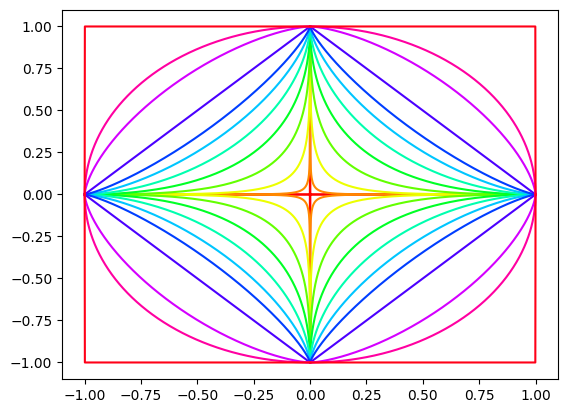

In [ ]:
for i, norm in enumerate([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 1, 1.5, 2, 757575237413]):
  cmap = get_cmap(12)
  draw_circle(norm, cmap(i))

## Usual model training stuff

f(w) + ||vec(w)||_p

In [ ]:
# do not change the code in the block below
# __________start of block__________
def train_model(model, train_loader, val_loader, loss_fn, opt, n_epochs: int, build_plot=True):
    train_loss = []
    val_loss = []
    val_accuracy = []


    for epoch in range(n_epochs):
        ep_train_loss = []
        ep_val_loss = []
        ep_val_accuracy = []
        start_time = time.time()

        model.train(True)
        for X_batch, y_batch in train_loader:
          #zero grad
            opt.zero_grad()

            # to device
            X_batch = X_batch.to(device)
            y_batch = y_batch.to(device)

            predictions = model(X_batch)
            loss =loss_func(predictions, y_batch)
            #back step
            loss.backward()
            # optimizer step
            opt.step()

            ep_train_loss.append(loss.item())

        model.train(False)
        model.eval()
        with torch.no_grad():
            for X_batch, y_batch in val_loader:

                X_batch = X_batch.to(device)
                y_batch = y_batch.to(device)

                predictions = model(X_batch)
                loss = loss_func(predictions, y_batch)

                ep_val_loss.append(loss.item())
                y_pred = predictions.max(1)[1].data
                ep_val_accuracy.append(np.mean((y_batch.cpu() == y_pred.cpu()).numpy()))

        train_loss.append(np.mean(ep_train_loss))
        val_loss.append(np.mean(ep_val_loss))
        val_accuracy.append(np.mean(ep_val_accuracy))

        if build_plot:
            plot_train_process(train_loss, val_loss, val_accuracy)
    return train_loss, val_loss, val_accuracy
# __________end of block__________




In [ ]:
import numpy as np
import os
import time


import torch
import torch.nn as nn
import torchvision
from torchvision import transforms

from IPython.display import clear_output
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure



device = 'cuda:0' if torch.cuda.is_available() else 'cpu'
print('Your device is: {}'.format(device))

input_shape = 28*28
num_classes = 10
input_channels = 1

def plot_train_process(train_loss, val_loss, val_accuracy):
    clear_output(True)
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))


    axes[0].set_title('Loss')
    axes[0].plot(train_loss, label='train')
    axes[0].plot(val_loss, label='validation')
    axes[0].legend()

    axes[1].set_title('Validation accuracy')
    axes[1].plot(val_accuracy)
    plt.show()

Your device is: cuda:0


In [ ]:

out_dict = dict()

# Technical function
def mkdir(path):
    if not os.path.exists(root_path):
        os.mkdir(root_path)
        print('Directory', path, 'is created!')
    else:
        print('Directory', path, 'already exists!')

root_path = 'fmnist'
mkdir(root_path)

download = True
train_transform = transforms.Compose([

     transforms.ToTensor(),
 ])


test_transform = transforms.Compose([
                                       transforms.ToTensor()])


fmnist_dataset_train = torchvision.datasets.FashionMNIST(root_path,
                                                        train=True,
                                                        transform=train_transform,
                                                        target_transform=None,
                                                        download=download)
fmnist_dataset_test = torchvision.datasets.FashionMNIST(root_path,
                                                       train=False,
                                                       transform=test_transform,
                                                       target_transform=None,
                                                       download=download)

train_loader = torch.utils.data.DataLoader(fmnist_dataset_train,
                                           batch_size=128,
                                           shuffle=True,
                                           num_workers=2)
test_loader = torch.utils.data.DataLoader(fmnist_dataset_test,
                                          batch_size=256,
                                          shuffle=False,
                                          num_workers=2)

Directory fmnist is created!


100%|██████████| 26421880/26421880 [00:01<00:00, 18462469.36it/s]


Extracting fmnist/FashionMNIST/raw/train-images-idx3-ubyte.gz to fmnist/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 307464.86it/s]


Extracting fmnist/FashionMNIST/raw/train-labels-idx1-ubyte.gz to fmnist/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:00<00:00, 5506723.10it/s]


Extracting fmnist/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to fmnist/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 19955893.71it/s]

Extracting fmnist/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to fmnist/FashionMNIST/raw



# No regularization

loss + ||W||_p

In [ ]:
model = nn.Sequential(
    nn.Flatten(), # This layer converts image into a vector to use Linear layers afterwards
    nn.Linear(input_shape, input_shape//2),
    nn.ReLU(),
    nn.Linear(input_shape//2, input_shape//4),
    nn.ReLU(),
    nn.Linear( input_shape//4, num_classes),

).to(device)


# do not change the code in the block below
# __________start of block__________
opt = torch.optim.Adam(model.parameters(), lr=3e-4)
loss_func = nn.CrossEntropyLoss()

In [ ]:
WX+b

In [ ]:
model[1].weight.grad

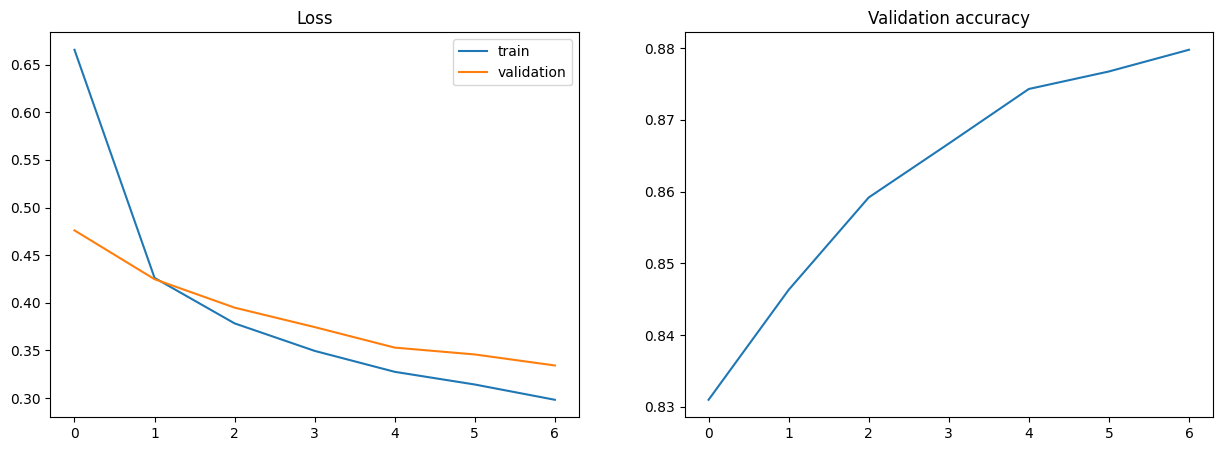

In [ ]:
n_epochs_1 = 7

train_loss, val_loss, val_accuracy = train_model(
    model,
    train_loader,
    test_loader,
    loss_func,
    opt,
    n_epochs_1
)

ylog(\hat{y}) + (1-y)log(1-\hat{y})

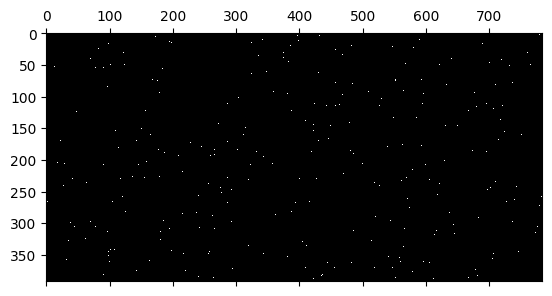

In [ ]:
plt.spy(model[1].weight.detach().cpu().numpy(), precision=1e-4)

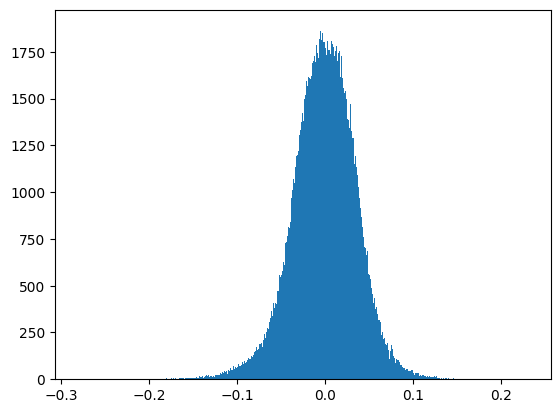

In [ ]:
plt.hist(model[1].weight.detach().cpu().numpy().reshape(1, -1)[0], bins = 1000);

## Training stuff

In [ ]:
class MLP_model(nn.Module):
  '''
    Multilayer Perceptron.
  '''
  def __init__(self, input_shape):
    super().__init__()
    self.layers = nn.Sequential(
      nn.Flatten(),
      nn.Linear(input_shape, input_shape//2),
    nn.ReLU(),
    nn.Linear(input_shape//2, input_shape//4),
    nn.ReLU(),
    nn.Linear( input_shape//4, 10)
    )





  def forward(self, x):
    '''Forward pass'''
    return self.layers(x)

  def compute_l2_loss(self, w):
      return torch.square(w).sum()

  def compute_l1_loss(self, w):
      return torch.abs(w).sum()

In [ ]:

def train_reg(model, train_loader, val_loader, loss_fn, opt, reg,n_epochs: int, build_plot=True):
    train_loss = []
    val_loss = []
    val_accuracy = []


    for epoch in range(n_epochs):
        ep_train_loss = []
        ep_val_loss = []
        ep_val_accuracy = []
        start_time = time.time()

        model.train(True)
        for X_batch, y_batch in train_loader:
          #zero grad
            opt.zero_grad()

            # to device
            X_batch = X_batch.to(device)
            y_batch = y_batch.to(device)

            predictions = model(X_batch)
            loss =loss_fn(predictions, y_batch)

            if reg == 'l1':
              l1_weight = 0.001
              l1_parameters = []
              for parameter in model.parameters():
                  l1_parameters.append(parameter.view(-1))
              l1 = l1_weight * model.compute_l1_loss(torch.cat(l1_parameters))
              loss += l1.to(device)

            if reg == 'l2':
              l2_weight = 0.001
              l2_parameters = []
              for parameter in model.parameters():
                  l2_parameters.append(parameter.view(-1))
              l2 = l2_weight * model.compute_l2_loss(torch.cat(l2_parameters))
              loss += l2
            #back step
            loss.backward()
            # optimizer step
            opt.step()

            ep_train_loss.append(loss.item())

        model.train(False)
        model.eval()
        with torch.no_grad():
            for X_batch, y_batch in val_loader:

                X_batch = X_batch.to(device)
                y_batch = y_batch.to(device)

                predictions = model(X_batch)
                loss = loss_fn(predictions, y_batch)

                ep_val_loss.append(loss.item())
                y_pred = predictions.max(1)[1].data
                ep_val_accuracy.append(np.mean((y_batch.cpu() == y_pred.cpu()).numpy()))

        train_loss.append(np.mean(ep_train_loss))
        val_loss.append(np.mean(ep_val_loss))
        val_accuracy.append(np.mean(ep_val_accuracy))

        if build_plot:
            plot_train_process(train_loss, val_loss, val_accuracy)
    return train_loss, val_loss, val_accuracy
# __________end of block__________

## L1

In [ ]:
model_l1 = MLP_model(input_shape).to(device)

opt_l1 = torch.optim.Adam(model_l1.parameters(), lr=3e-4)
loss_func_l1 = nn.CrossEntropyLoss()

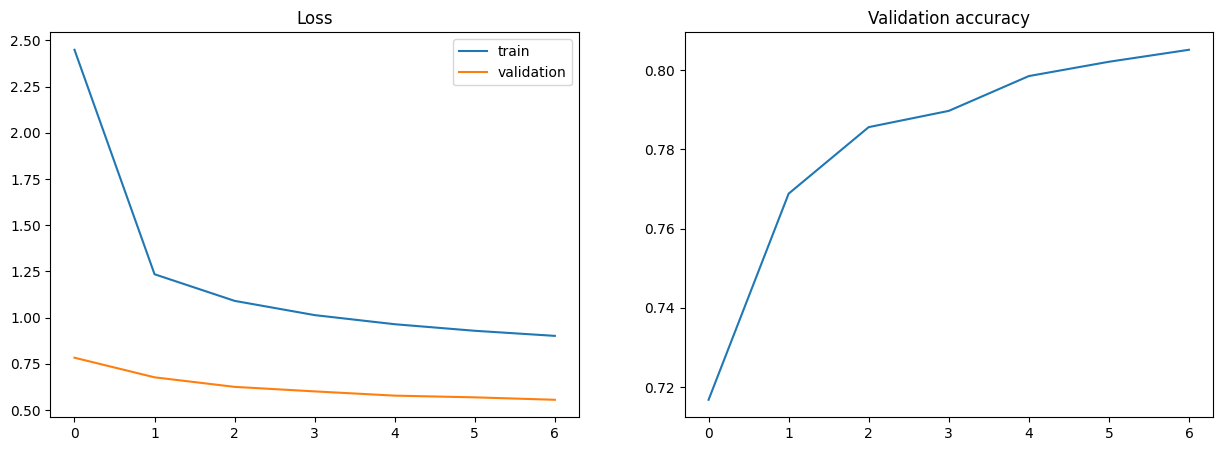

In [ ]:
n_epochs_1 = 7

train_loss, val_loss, val_accuracy = train_reg(
    model_l1,
    train_loader,
    test_loader,
    loss_func_l1,
    opt_l1,
    'l1',
    n_epochs_1,

)

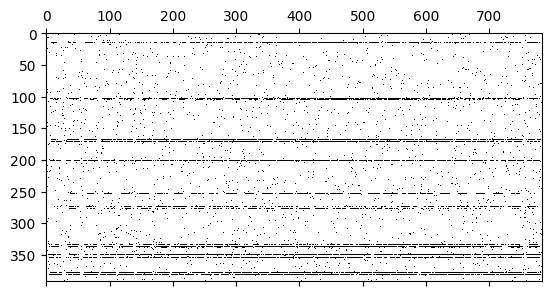

In [ ]:
plt.spy(model_l1.layers[1].weight.detach().cpu().numpy(), precision=1e-4)

In [ ]:
model_l2 = MLP_model(input_shape).to(device)

opt_l2 = torch.optim.Adam(model_l2.parameters(), lr=3e-4)
loss_func_l2 = nn.CrossEntropyLoss()


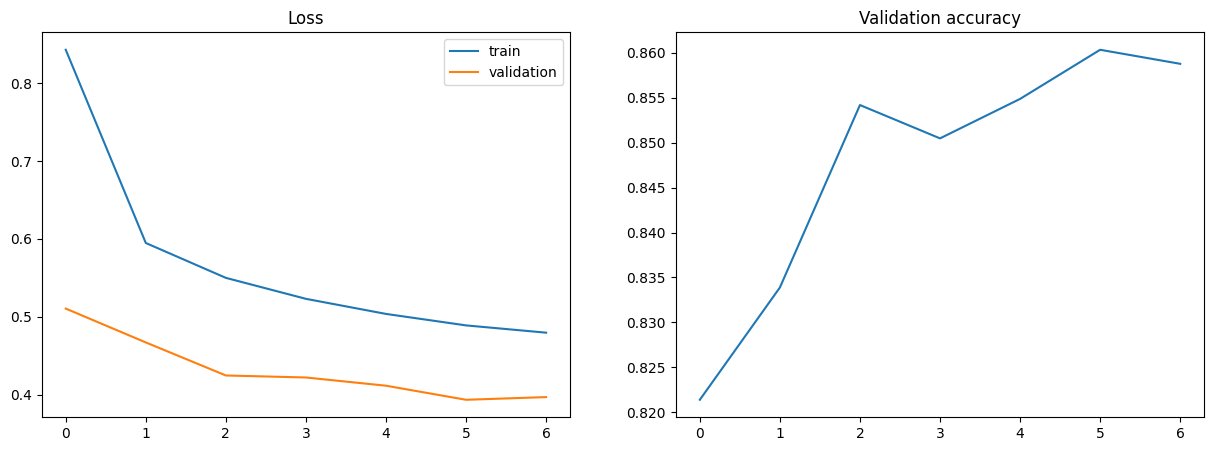

In [ ]:
n_epochs_1 = 7

train_loss, val_loss, val_accuracy = train_reg(
    model_l2,
    train_loader,
    test_loader,
    loss_func_l2,
    opt_l2,
    'l2',
    n_epochs_1,

)

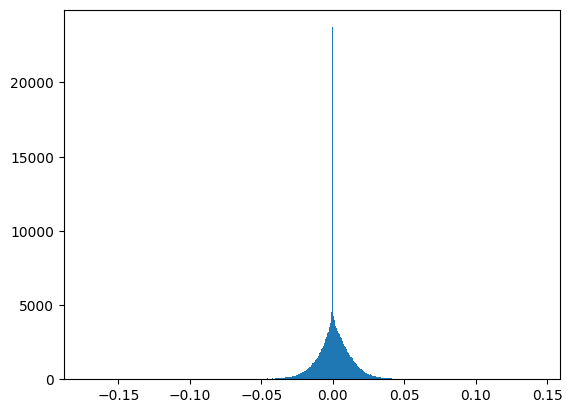

In [ ]:
plt.hist(model_l2.layers[1].weight.detach().cpu().numpy().reshape(1, -1)[0], bins = 1000);

#MATRICES

Positive Definite marix
$$
x^T A x > 0 ∀ x\in R^n {\\\0}
$$
Trace
$$
Trace (A) = \sum_i A_{ii} =∑_i λ_i(A)
$$

$$
Trace (ACBD) =Trace (DACB) =Trace (BDAC) =Trace (CBDA)
$$

$$
Trace (A+B) = Trace (A)+ Trace (B)  
$$

$$
Trace (A^T) = Trace (A)  
$$

$$
Trace (cA) = cTrace (A)  
$$



determinant
$$
det(A) = ∏_i λ_i(A)
$$

$$
det(AB) =det(A) det(B)
$$
$$
det(A^T) =det(A)
$$
$$
det(A^{-1}) =\frac{1}{det(A)}
$$

$$
cond(A) = ||A||||A^{-1}||
$$

# MATRIX NORMS

$$
\|A\|_p = \sup_{x \neq 0} \frac{\|Ax\|_p}{\|x\|_p}
$$

$$
\|A\|_1 = \max_{1 \leq j \leq n} \sum_{i=1}^m |a_{ij}|\\
\|A\|_{∞} = \max_{1 \leq i \leq m} \sum_{j=1}^n |a_{ij}|
$$

$$
\|A\|_2 = \sqrt{λ_{\max}(A^*A)} = σ_{\max}(A)\\
\|A\|_F = \sqrt{Trace(A^T A)}=(\sum_{i=m}^n \sum_{j=1}^n |a_{ij}|^2)^{\frac{1}{2}}
$$

### dot product between matrices, $X,Y \in R^{m × n}$

$$
<X, Y> = Trace(X^T Y) = ∑_i ∑_j X_{ij} Y_{ij}
$$

## Gradient

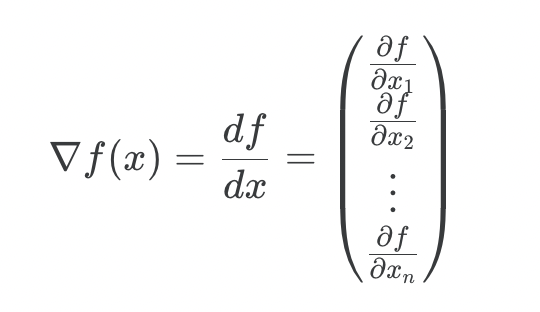

## Hessian

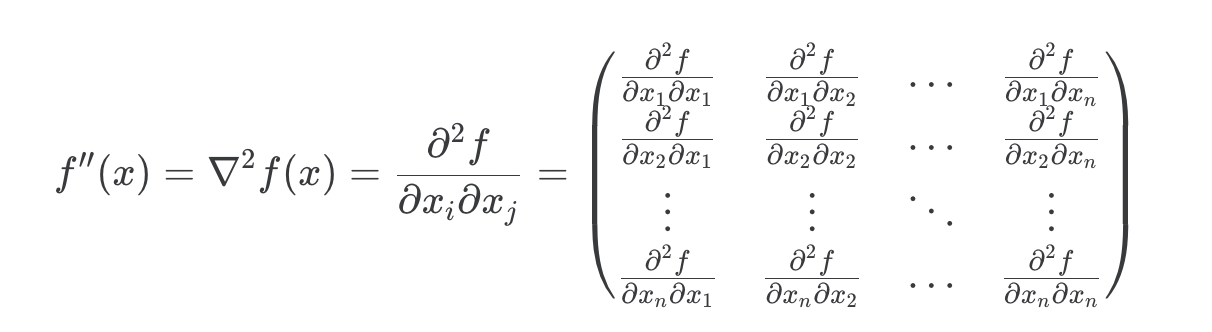

## Jacobian

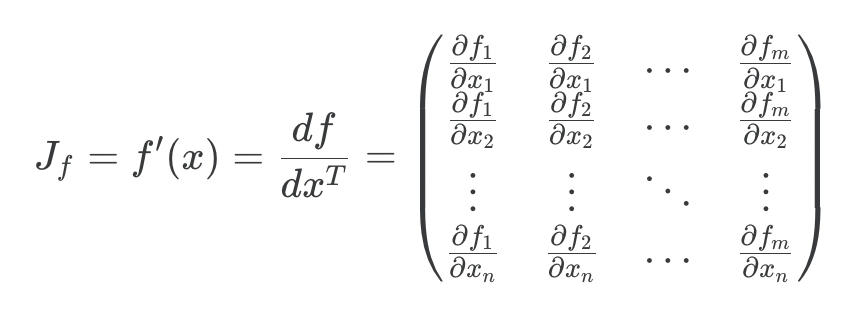

In order to find Gradient of the function we should write $df$ in the following way
$$
df(x) = <∇f(x),dx>
$$

We can find hessian in the similar manner
$$
d^2f(x) = <∇^2f(x)dx_1, dx_2>
$$

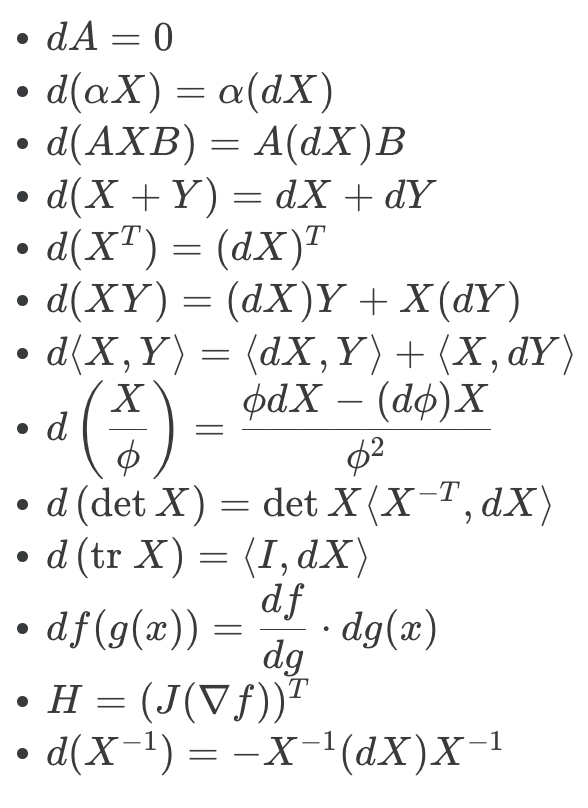

## Calculate the gradients of the following functions. Capital letters are matrices and small lettters are vectors

$$
f(x) = x^TAx + b^Tx +c
$$

$$
f(x) = \frac{1}{2} \|Ax-b\|^2_2
$$

$$
f(x) = ln(1+e^{<a,x>})
$$

$$
f(X) = \|X\|^2_F
$$

$$
f(X) = Trace(AXB)
$$

# SINGULAR VALUE DECOMPOSITION



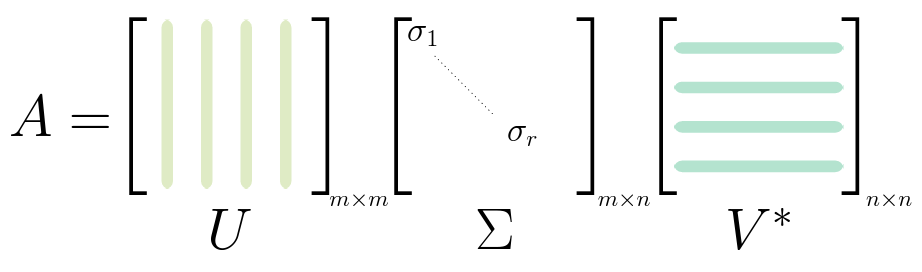

To compute low-rank approximation, we need to compute **singular value decomposition** (SVD).

**Theorem** Any matrix $A\in \mathbb{C}^{n\times m}$ can be written as a product of three matrices:  

$$ A = U \Sigma V^*, $$

where
- $U$ is an $n \times K$ unitary matrix,
- $V$ is an $m \times K$ unitary matrix, $K = \min(m, n)$,
- $\Sigma$ is a diagonal matrix with non-negative elements $\sigma_1 \geq  \ldots, \geq \sigma_K$ on the diagonal.
- Moreover, if $\text{rank}(A) = r$, then $\sigma_{r+1} = \dots = \sigma_K = 0$.

## Eckart-Young theorem (we need this one later)

The best low-rank approximation can be computed by SVD.

**Theorem:** Let $r < \text{rank}(A)$, $A_r = U_r \Sigma_r V_r^*$. Then

$$ \min_{\text{rank}(B)=r} \|A - B\|_2 = \|A - A_r\|_2 = \sigma_{r+1}. $$

The same holds for $\|\cdot\|_F$, but $\|A - A_r\|_F = \sqrt{\sigma_{r+1}^2 + \dots + \sigma_{\min (n,m)}^2}$.

# SPECTRAL DECOMPOSITION

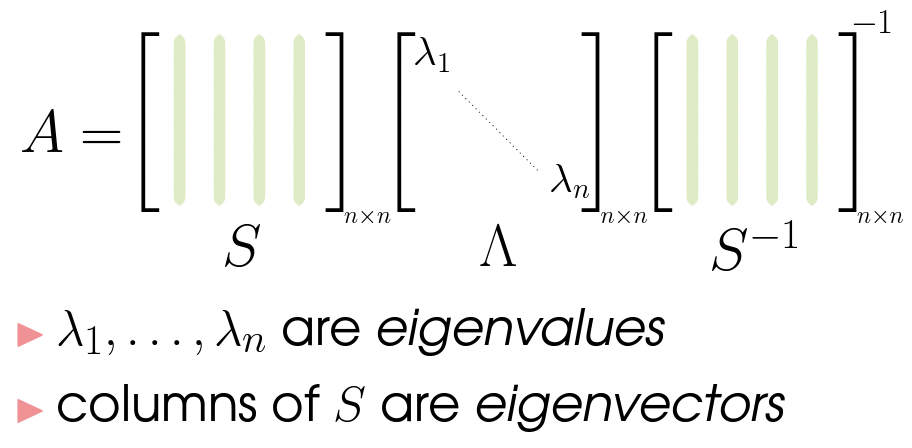

When spectral decomposition exists?

# QR DECOMPOSITION

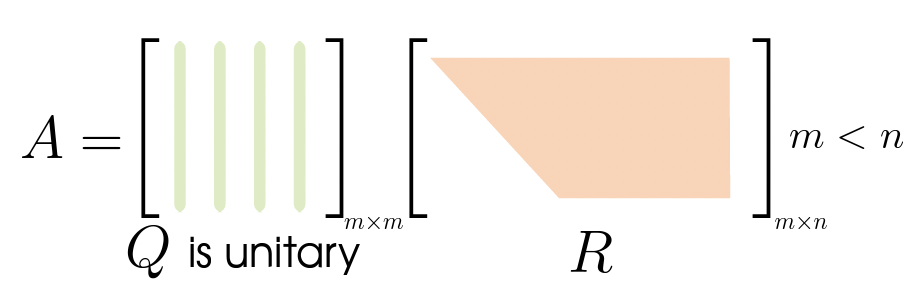

Always exusts

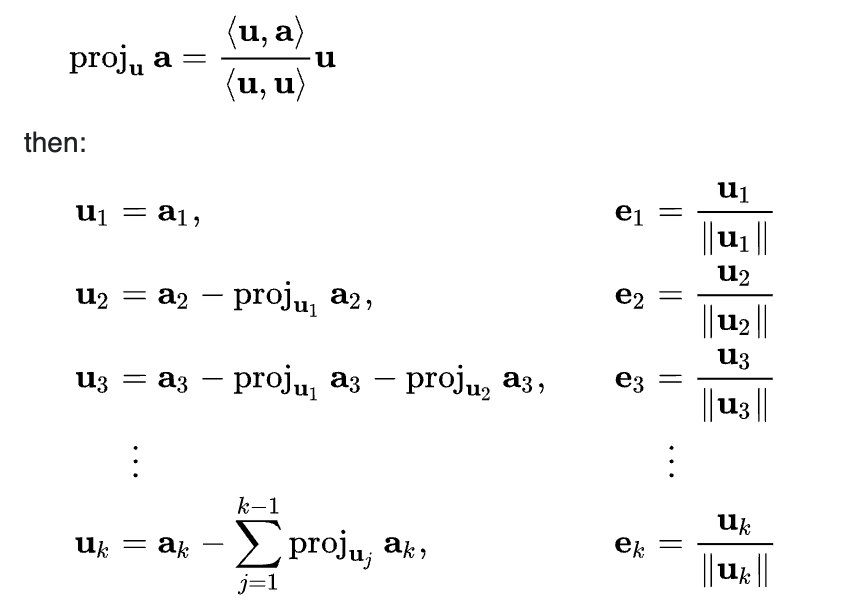

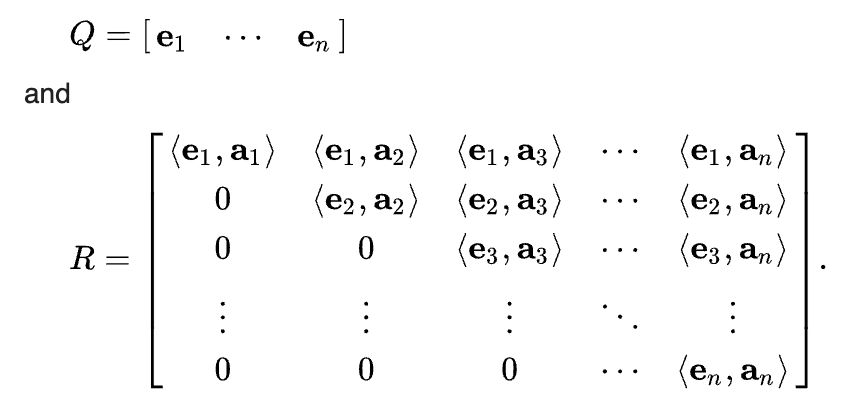

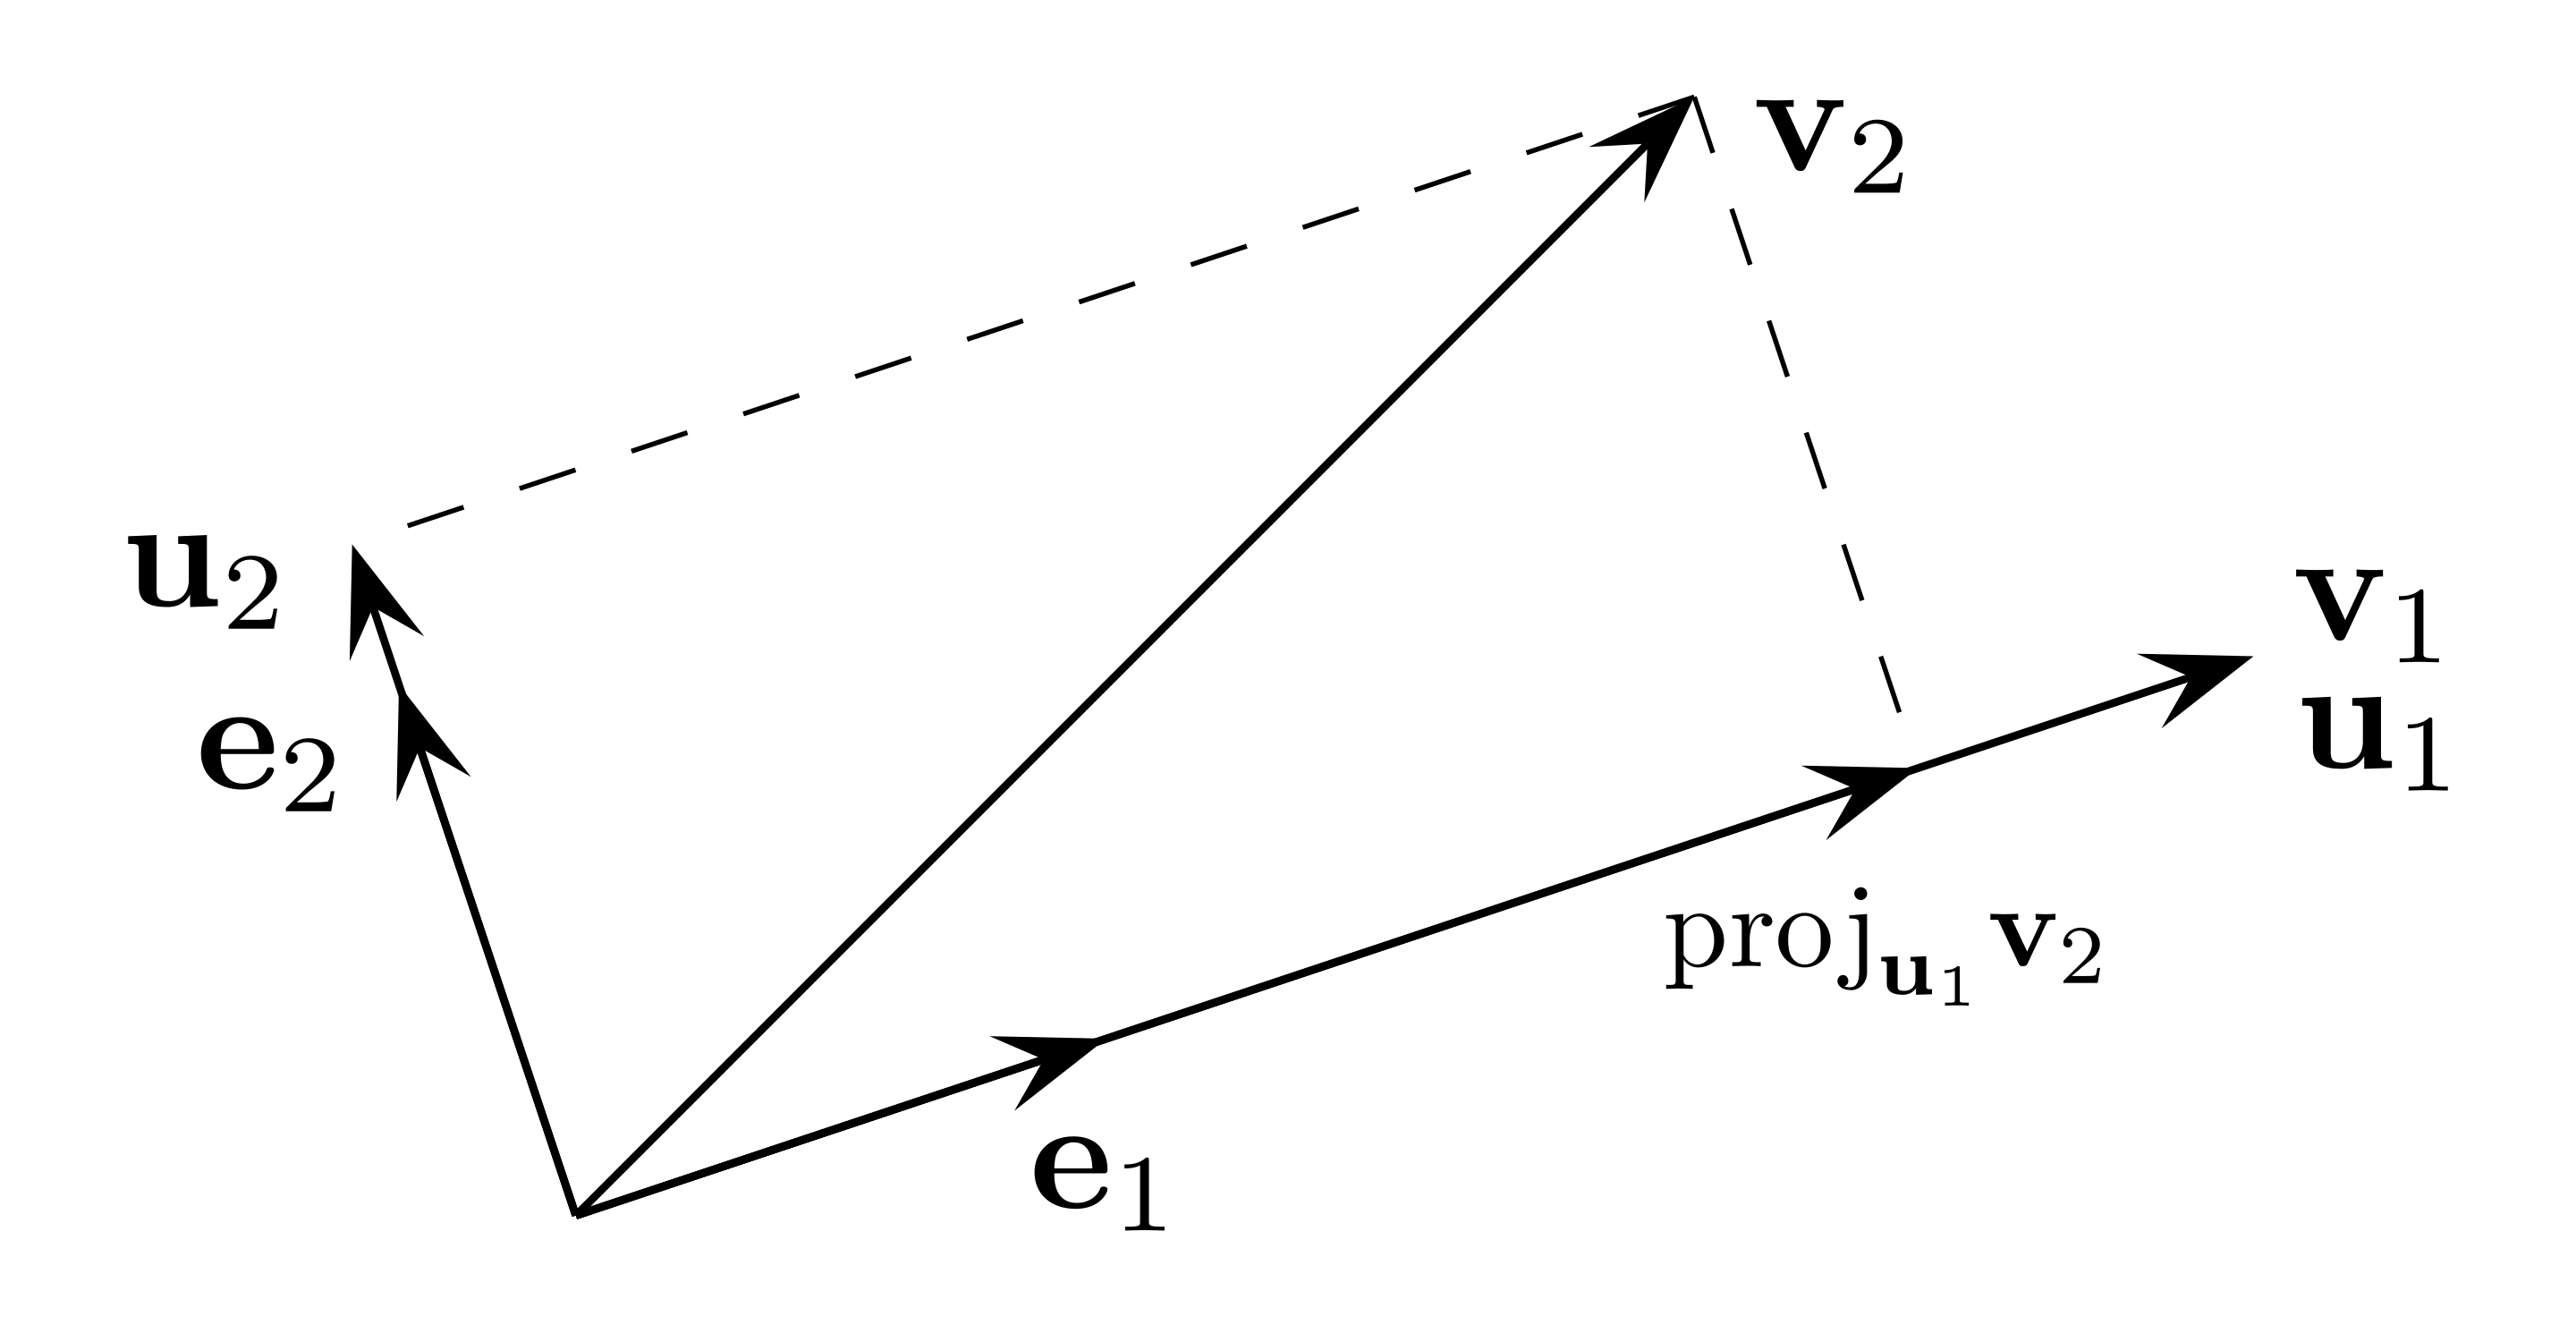

 ## LU DECOMPOSITION

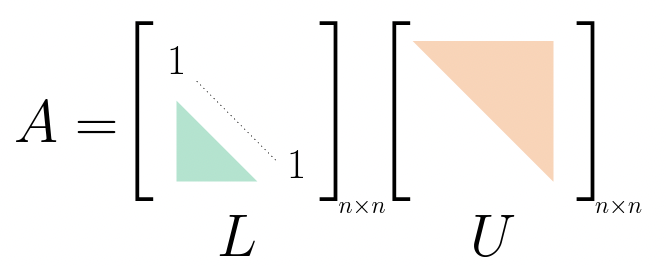

**LU** exists when all leading minors are nonzero

## Gaussian elimination and LU decomposition

- Gaussian elimination is the computation of one of the most important matrix decompositions: **LU-decomposition**.

**Definition**: LU-decomposition of the square matrix $A$ is the representation

$$A =  LU,$$

where
- $L$ is **lower triangular** (elements strictly above the diagonal are zero)
- $U$ is **upper triangular** matrix (elements strictly below the diagonal are zero)

This factorization is **non-unique**, so it is typical to require that the matrix $L$ has ones on the diagonal.


Ax  = b
x = A^{-1}f


In [ ]:
Ax = f

**Main goal** of the LU decomposition is to solve linear system, because

$$ A^{-1} f = (L U)^{-1} f = U^{-1} L^{-1} f, $$

and this reduces to the solution of two linear systems **forward step**

$$ L y = f, $$

and **backward step**

$$ U x = y. $$

# LINEAR REGRESSION

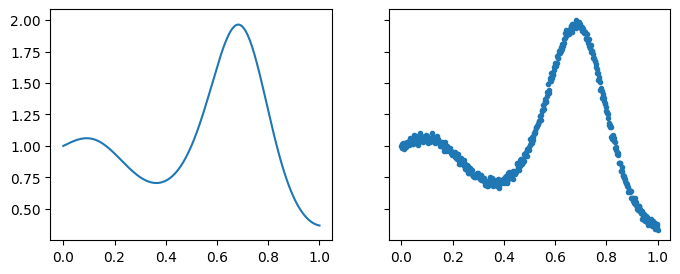

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
N_samples = 500
x = np.linspace(0, 1, N_samples)
np.random.seed(4)
y = np.exp(np.cos(3*np.pi*x)*x)
noise = 0.02*np.random.randn(*x.shape)

fig, ax = plt.subplots(1, 2, figsize=(8, 3), sharey=True)
ax[0].plot(x, y)
ax[1].plot(x, y + noise, ".");

In [ ]:
np.random.seed(11)
ind = np.arange(N_samples, dtype=int)
ind_train = np.random.choice(ind, size=(300,), replace=False)
ind_test = np.array(list(set(ind) - set(ind_train)))

x_train, x_test = x[ind_train], x[ind_test]
y_train, y_test = y[ind_train] + noise[ind_train], y[ind_test]

n_poly = 8
f_train = np.stack([x_train**k for k in range(n_poly)], 1)
f_test = np.stack([x_test**k for k in range(n_poly)], 1)

In [ ]:
class LinearRergession():
    '''LinearRergession with direct solution
    '''
    def __init__(
        self,
        batch_size: int=25,
        lr: float=1e-2,
        num_steps: int=5000,
    ) -> None:

        self.batch_size = batch_size
        self.lr = lr
        self.num_steps = num_steps



    def fit (self, X_train, y_train):
        q,r = np.linalg.qr(X_train)
        # w = np.linalg.solve(r, q.T @ y_train)
        w = np.linalg.pinv(r) @ q.T @ y_train
        self.w = w
        return self



    def predict(self, X):
        return X@self.w

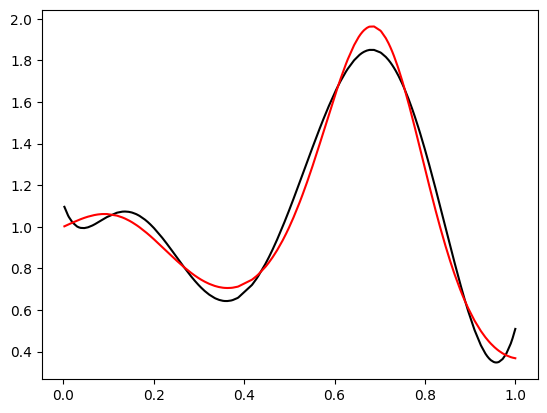

In [ ]:
own_lr = LinearRergession(lr=1e-5, num_steps=50000).fit(f_train, y_train)

y_pred = own_lr.predict(f_test)

plt.plot(x_test, y_pred, color="black")
plt.plot(x_test, y_test, color="red");

In [ ]:
own_lr.w

array([ 1.10812194e+00, -6.43238271e+00,  1.17264730e+02, -7.84771546e+02,
        2.27669681e+03, -3.14692205e+03,  2.04280691e+03, -4.99241861e+02])

#REGULARIZATION

One way to fix this issue is L2 regularization

$$
w = \arg\min \|Y - X^T w\|^2 + \lambda \|w\|^2
$$

Thus our direct solution becomes

$$
w = (X^T X + \lambda I)^{-1}X^T y
$$







To be honest the main purpose of the l2 regularization is not to let weights become too large. But it also fixes the ill-poseness of the problem

One way to fix this issue is L2 regularization

$$
w = \arg\min \|Y - X^T w\|^2 + \lambda \|w\|^2
$$

Thus our direct solution becomes

$$
w = (X^T X + \lambda I)^{-1}X^T y
$$

$$
X = USV^T
$$
We obtain

$$
w = V(S^2 + \lambda I)^{-1}SU^T y
$$

In [ ]:
class LinearRergession():
    '''LinearRergession with direct solution
    '''
    def __init__(
        self,
        batch_size: int=25,
        lr: float=1e-2,
        num_steps: int=5000,
        lambd : float=1e-2
    ) -> None:

        self.batch_size = batch_size
        self.lr = lr
        self.num_steps = num_steps
        self.lambd = lambd



    def fit (self, X_train, y_train):
        q,r = QR(X_train)
        # w = np.linalg.solve(r, q.T @ y_train)
        w = np.linalg.pinv(r) @ q.T @ y_train
        self.w = w
        return self

    def fit_reg (self, X_train, y_train):
        U, S, VT = np.linalg.svd(X_train,  full_matrices=False)

        w = np.linalg.pinv(VT) @ np.linalg.pinv(np.diag(S**2+self.lambd)) @ np.diag(S) @U.T @ y_train
        self.w = w
        return self
    def predict(self, X):
        return X@self.w

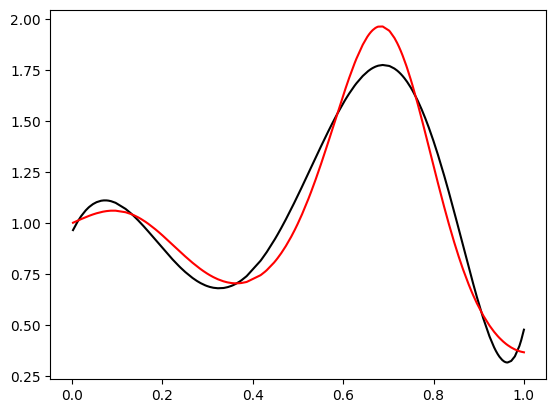

In [ ]:

own_lr = LinearRergession(lr=1e-3, num_steps=500, lambd =0.0001).fit_reg(f_train, y_train)

y_pred = own_lr.predict(f_test)

plt.plot(x_test, y_pred, color="black")
plt.plot(x_test, y_test, color="red");

In [ ]:
own_lr.w

array([  0.95688597,   4.64668477, -40.13529956,  74.69809283,
        14.47081407, -64.43771022, -53.40657899,  63.6857245 ])

# PRINCIPAL COMPONENT ANALISIS

In [ ]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
# you will need internet connection for this block
csv_url = "https://raw.githubusercontent.com/hsu-ai-course/hsu.ai/master/code/datasets/ml/nutrition.csv"
dataset = pd.read_csv(csv_url)

# there are no (0) saturated fats in vegetables, that's why we replace N/A values with 0
dataset = dataset.fillna(0)

In [ ]:
classes_list = dataset["Food Type"][1:].values
names = dataset["Food and Serving"][1:].values
dimensions = dataset.columns[1:]

print("Names:", *names[:5], "...", sep=" | ")
print()
print("Classes:", *set(classes_list), sep=" | ")
print()
print("Dimensions:", *dimensions[:5], "...", sep=" | ")

dataset.head()

Names: | Asparagus, 5 spears (93 g/3.3 oz) | Bell Pepper, 1 medium (148 g/5.3 oz) | Broccoli, 1 medium stalk (148 g/5.3 oz) | Carrot, 1 carrot, 7" long, 1 1/4" diameter (78 g/2.8 oz) | Cauliflower, 1/6 medium head (99 g/3.5 oz) | ...

Classes: | Seafood, Serving Size (84 g/3 oz) | Fruits Serving Size (gram weight/ounce weight) | Vegetables, Serving Size (gram weight/ ounce weight)

Dimensions: | Calories | Calories from Fat | Total Fat 1 | Total Fat 2 | Sodium 1 | ...


Food and Serving  Calories  \
0                                                  0       0.0   
1                  Asparagus, 5 spears (93 g/3.3 oz)      20.0   
2               Bell Pepper, 1 medium (148 g/5.3 oz)      25.0   
3            Broccoli, 1 medium stalk (148 g/5.3 oz)      45.0   
4  Carrot, 1 carrot, 7" long, 1 1/4" diameter (78...      30.0   

   Calories from Fat Total Fat 1 Total Fat 2 Sodium 1 Sodium 2 Potassium 1  \
0                0.0         (g)       (%DV)      (g)    (%DV)         (g)   
1                0.0           0           0        0        0         230   
2                0.0           0           0       40        2         220   
3                0.0         0.5           1       80        3         460   
4                0.0           0           0       60        3         250   

  Potassium 2 Total Carbo-hydrate 1  ... Protein Vitamin A Vitamin C Calcium  \
0       (%DV)                   (g)  ...     (g)     (%DV)     (%DV)   (%DV)   
1           7                     4  ...       2        10        15       2   
2           6                     6  ...       1         4       190       2   
3          13                     8  ...       4         6       220       6   
4           7                     7  ...       1       110        10       2   

    Iron Saturated Fat Saturated Fat 2 Chole-sterol 1 Chole-sterol 2  \
0  (%DV)         (%DV)           (mg)           (%DV)          (mg)    
1      2             0               0              0              0   
2      4             0               0              0              0   
3      6             0               0              0              0   
4      2             0               0              0              0   

                                           Food Type  
0                                                  0  
1  Vegetables, Serving Size (gram weight/ ounce w...  
2  Vegetables, Serving Size (gram weight/ ounce w...  
3  Vegetables, Serving Size (gram weight/ ounce w...  
4  Vegetables, Serving Size (gram weight/ ounce w...  

[5 rows x 24 columns]

In [ ]:
classes = list(set(classes_list))
colors = ["red", "green", "blue", "black", "magenta"]
class_colors = {}
for i in range(len(classes)):
    class_colors[classes[i]] = colors[i % len(colors)]

print(class_colors)
color_list = [class_colors[a] for a in classes_list]

{'Seafood, Serving Size (84 g/3 oz)': 'red', 'Fruits Serving Size (gram weight/ounce weight)': 'green', 'Vegetables, Serving Size (gram weight/ ounce weight)': 'blue'}


In [ ]:
def show_points_2d(X, Y, xaxis, yaxis):
    global names, classes_list, class_colors
    plt.figure(figsize=(15,10))
    plt.xlabel(xaxis)
    plt.ylabel(yaxis)
    classes = set()
    for x, y, name, label in zip(X, Y, names, classes_list):
        if not label in classes:
            plt.plot([x], [y], "o", markersize=20, color=class_colors[label], label=label)
            classes.add(label)
        else:
            plt.plot([x], [y], "o", markersize=20, color=class_colors[label])
        plt.text(x, y, name)
    plt.legend()
    plt.axvline(0)
    plt.axhline(0)
    plt.show()

def show_points_3d(X, Y, Z):
    global color_list
    fig = plt.figure(figsize=(15, 10))
    ax = fig.add_subplot(111, projection='3d')
    for x, y, z, color in zip(X, Y, Z, color_list):
        ax.scatter([x], [y], [z], marker='o', color=color)
    plt.show()

def show_matrix(A, xaxis, yaxis):
    plt.figure(figsize=(15,10))
    plt.xlabel(xaxis)
    plt.ylabel(yaxis)
    plt.imshow(A)
    plt.show()

Raw matrix values, columns are objects (61, 22)


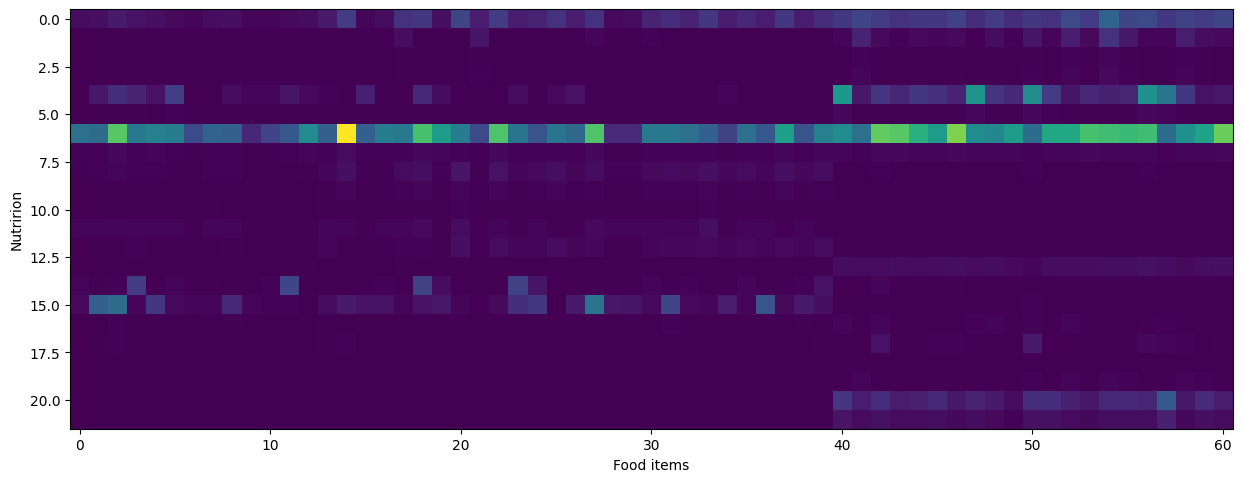

2 random dimensions distribution


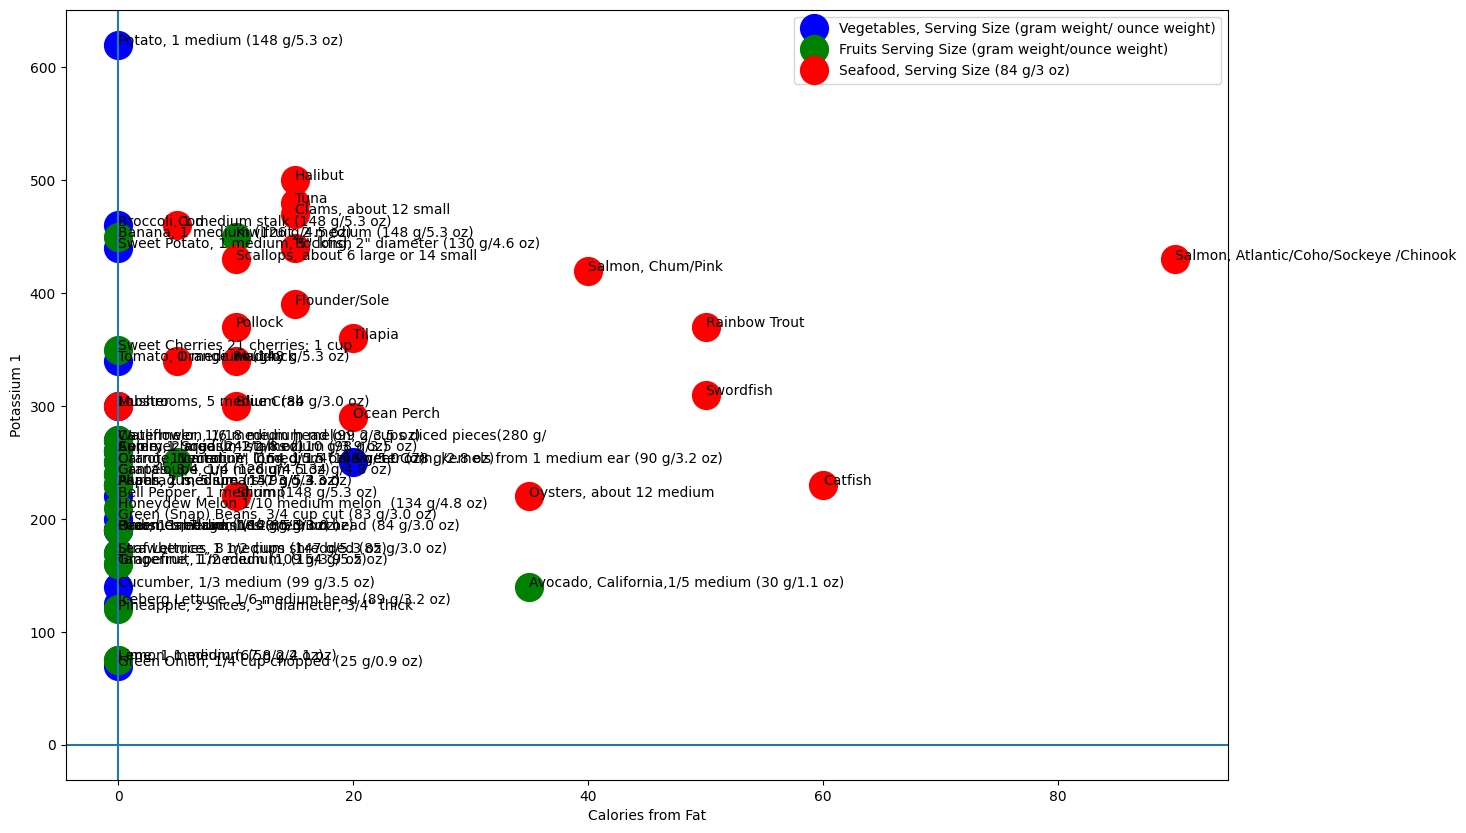

In [ ]:
A = dataset.to_numpy()[1:,1:-1].astype('float64')
print("Raw matrix values, columns are objects", A.shape)
show_matrix(A.T, "Food items", "Nutririon")

print("2 random dimensions distribution")
show_points_2d(A.T[1], A.T[6], dimensions[1], dimensions[6])

Suppose we have matrix $X$, where rows are observation and columns are features of the observation. We want to reduse the dimension of feature to $d$. We will be looking for a new basis $U$, which meet the following requirments:
1. <$u_i$,  $u_j$ > = 0
2. <$u_i$,  $u_i$ > = 1
3. When projecting the samples onto components $u_1, \dots, u_d$ we obtain the maximal dispersion among all possible ways to choose the $d$ components

The dispersion of the samples projected onto new basis is $\sum ||Xu_i ||^2$. We want to maximize the dispersion for every component. Let's do it for the first component.

The problem is the following:

$$
||Xu_1 ||^2 → max\\
||u_1||^2 = 1
$$

We compute the Lagrangian
$$
L(u_1, \lambda) = <Xu_1, Xu_1> + \lambda (<u_1>-1)\\
\frac{\delta L}{\delta u_1} = 2Xu_1+ 2\lambda u_1
$$

We can see that $u_1$ is the eigenvector of $X^T X$

$$
||Xu_1 ||^2  = <Xu_1, Xu_1> = \lambda <u_1, u_1> = \lambda → max\\
$$

Thus $\lambda$ must be a maximal eigenvalue.

How to solve the problem for $u_2$?

##**PCA Algoritm**

1) Center the data

$$
\overline{X} = X - \mu
$$

 $\mu$ is a feature's average

2) Build the covariation matrix from $X_{centered}$ of size $n \times m$. $n$ -number of observation, $m$ - number of features.

$$
 Σ = \frac{1}{n-1} \overline{X}^{\top} \overline{X}
$$


3)  eigendecomposition for$Σ$

$$
Σ = V^{-1} Λ V
$$

 $V$ is eigenvectors, and $\Lambda$ diagonal matrix with eigenvalues.

4) Sort eigenvalues.

5) Take the first  $k$ vectors of $k$ biggest eigenvalues

$$
W = V[:, :k] Λ[:, :k]
$$

6) Project the data on new basis

$$
T = \overline{X} W
$$

In [ ]:
def centered(A):
    C = A.copy()
    centers = np.mean(A, axis=0)
    C = A.T - centers.reshape((22,1))
    return C.T

Ac = centered(A)

assert np.allclose(np.mean(Ac, axis=0), np.zeros((22, 1))), "After centering, average value of the column should be equal to 0"



In [ ]:
def covariance_matrix(Ac):
  n, m = Ac.shape
  cov = Ac.T @ Ac /(n-1)
  return cov.astype('float64')

cov1 = covariance_matrix(Ac)

assert np.linalg.norm(cov1-np.cov(Ac.T)) <10**(-10)

In [ ]:
eigenvalues, eigenvectors = np.linalg.eig(cov1)
assert np.isclose(np.linalg.norm(eigenvalues[0] * eigenvectors[:, 0] - cov1 @ eigenvectors[:, 0]), 0)

In [ ]:
eigenvalues

array([1.65060377e+04, 7.10326747e+03, 2.80440726e+03, 1.22112257e+03,
       7.48025129e+02, 4.03859737e+02, 1.78726123e+02, 4.47815321e+01,
       2.11074915e+01, 1.06621381e+01, 4.40149961e+00, 3.43475286e+00,
       1.23268269e+00, 2.83646549e-01, 1.95395949e-01, 7.84224849e-02,
       5.33738624e-02, 3.91664626e-02, 1.86617070e-02, 4.06580074e-03,
       2.27431151e-04, 4.79441412e-16])

You can use the default function to compute eigenvalue decomposition, or use this nice algorithm.

## QR algorithm

Consider Eigen Decomposition

$$
A = Q T Q^{*}
$$

We can rewrite it the following way

$$
Q T = A Q
$$

We can write down the iterative process

$$
Q_{k+1} R_{k+1}  = A Q_{k}, \: \: \: \: \: \: \: \: Q^{*}_{k+1}  A  =R_{k+1}  Q^{*}_{k}
$$

Introduce

$$
A_k = Q^{*}_{k} A Q_{k} = Q^{*}_{k} Q_{k+1} R_{k+1} = 	\widehat{Q}_{k} R_{k+1}
$$

And the new approximation

$$
A_{k+1} = Q^{*}_{k+1} A Q_{k+1} = (Q^{*}_{k+1}  A  =R_{k+1}) =  R_{k+1} \widehat{Q}_{k}
$$

## SO we can come up with the QR algoritm

1) Set $A_0 = A$


2) Compute QR factorization $A_k = Q_k R_k$




3) Set $A_{k+1} = R_k Q_k $

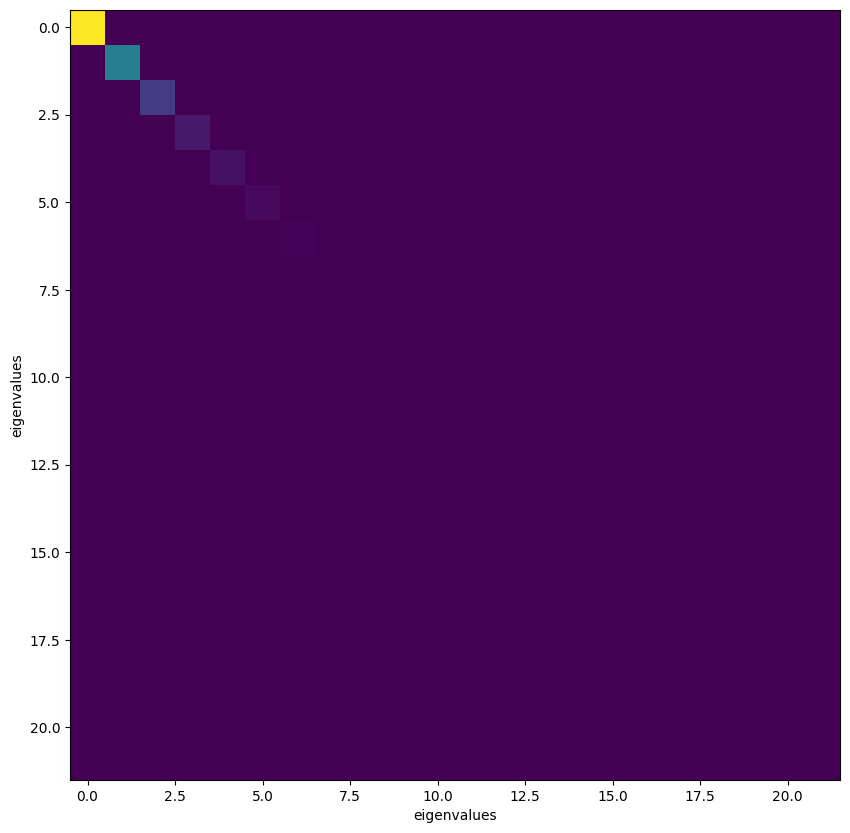

In [ ]:
def QR_algorithm(X, iters=10000):
    A = X.copy()
    PQ = np.eye(A.shape[0])
    for i in range(iters):
        Q, R = np.linalg.qr(A)
        A = R @ Q
        PQ = PQ @ Q

    return np.diag(A), PQ

eigenvalues, eigenvectors = QR_algorithm(cov1)
assert np.isclose(np.linalg.norm(eigenvalues[0] * eigenvectors[:, 0] - cov1 @ eigenvectors[:, 0]), 0),  "This was pretty simple eigenvalues test. And you failed even the test :("

show_matrix(np.diag(eigenvalues), "eigenvalues", "eigenvalues")

2 first dimensions


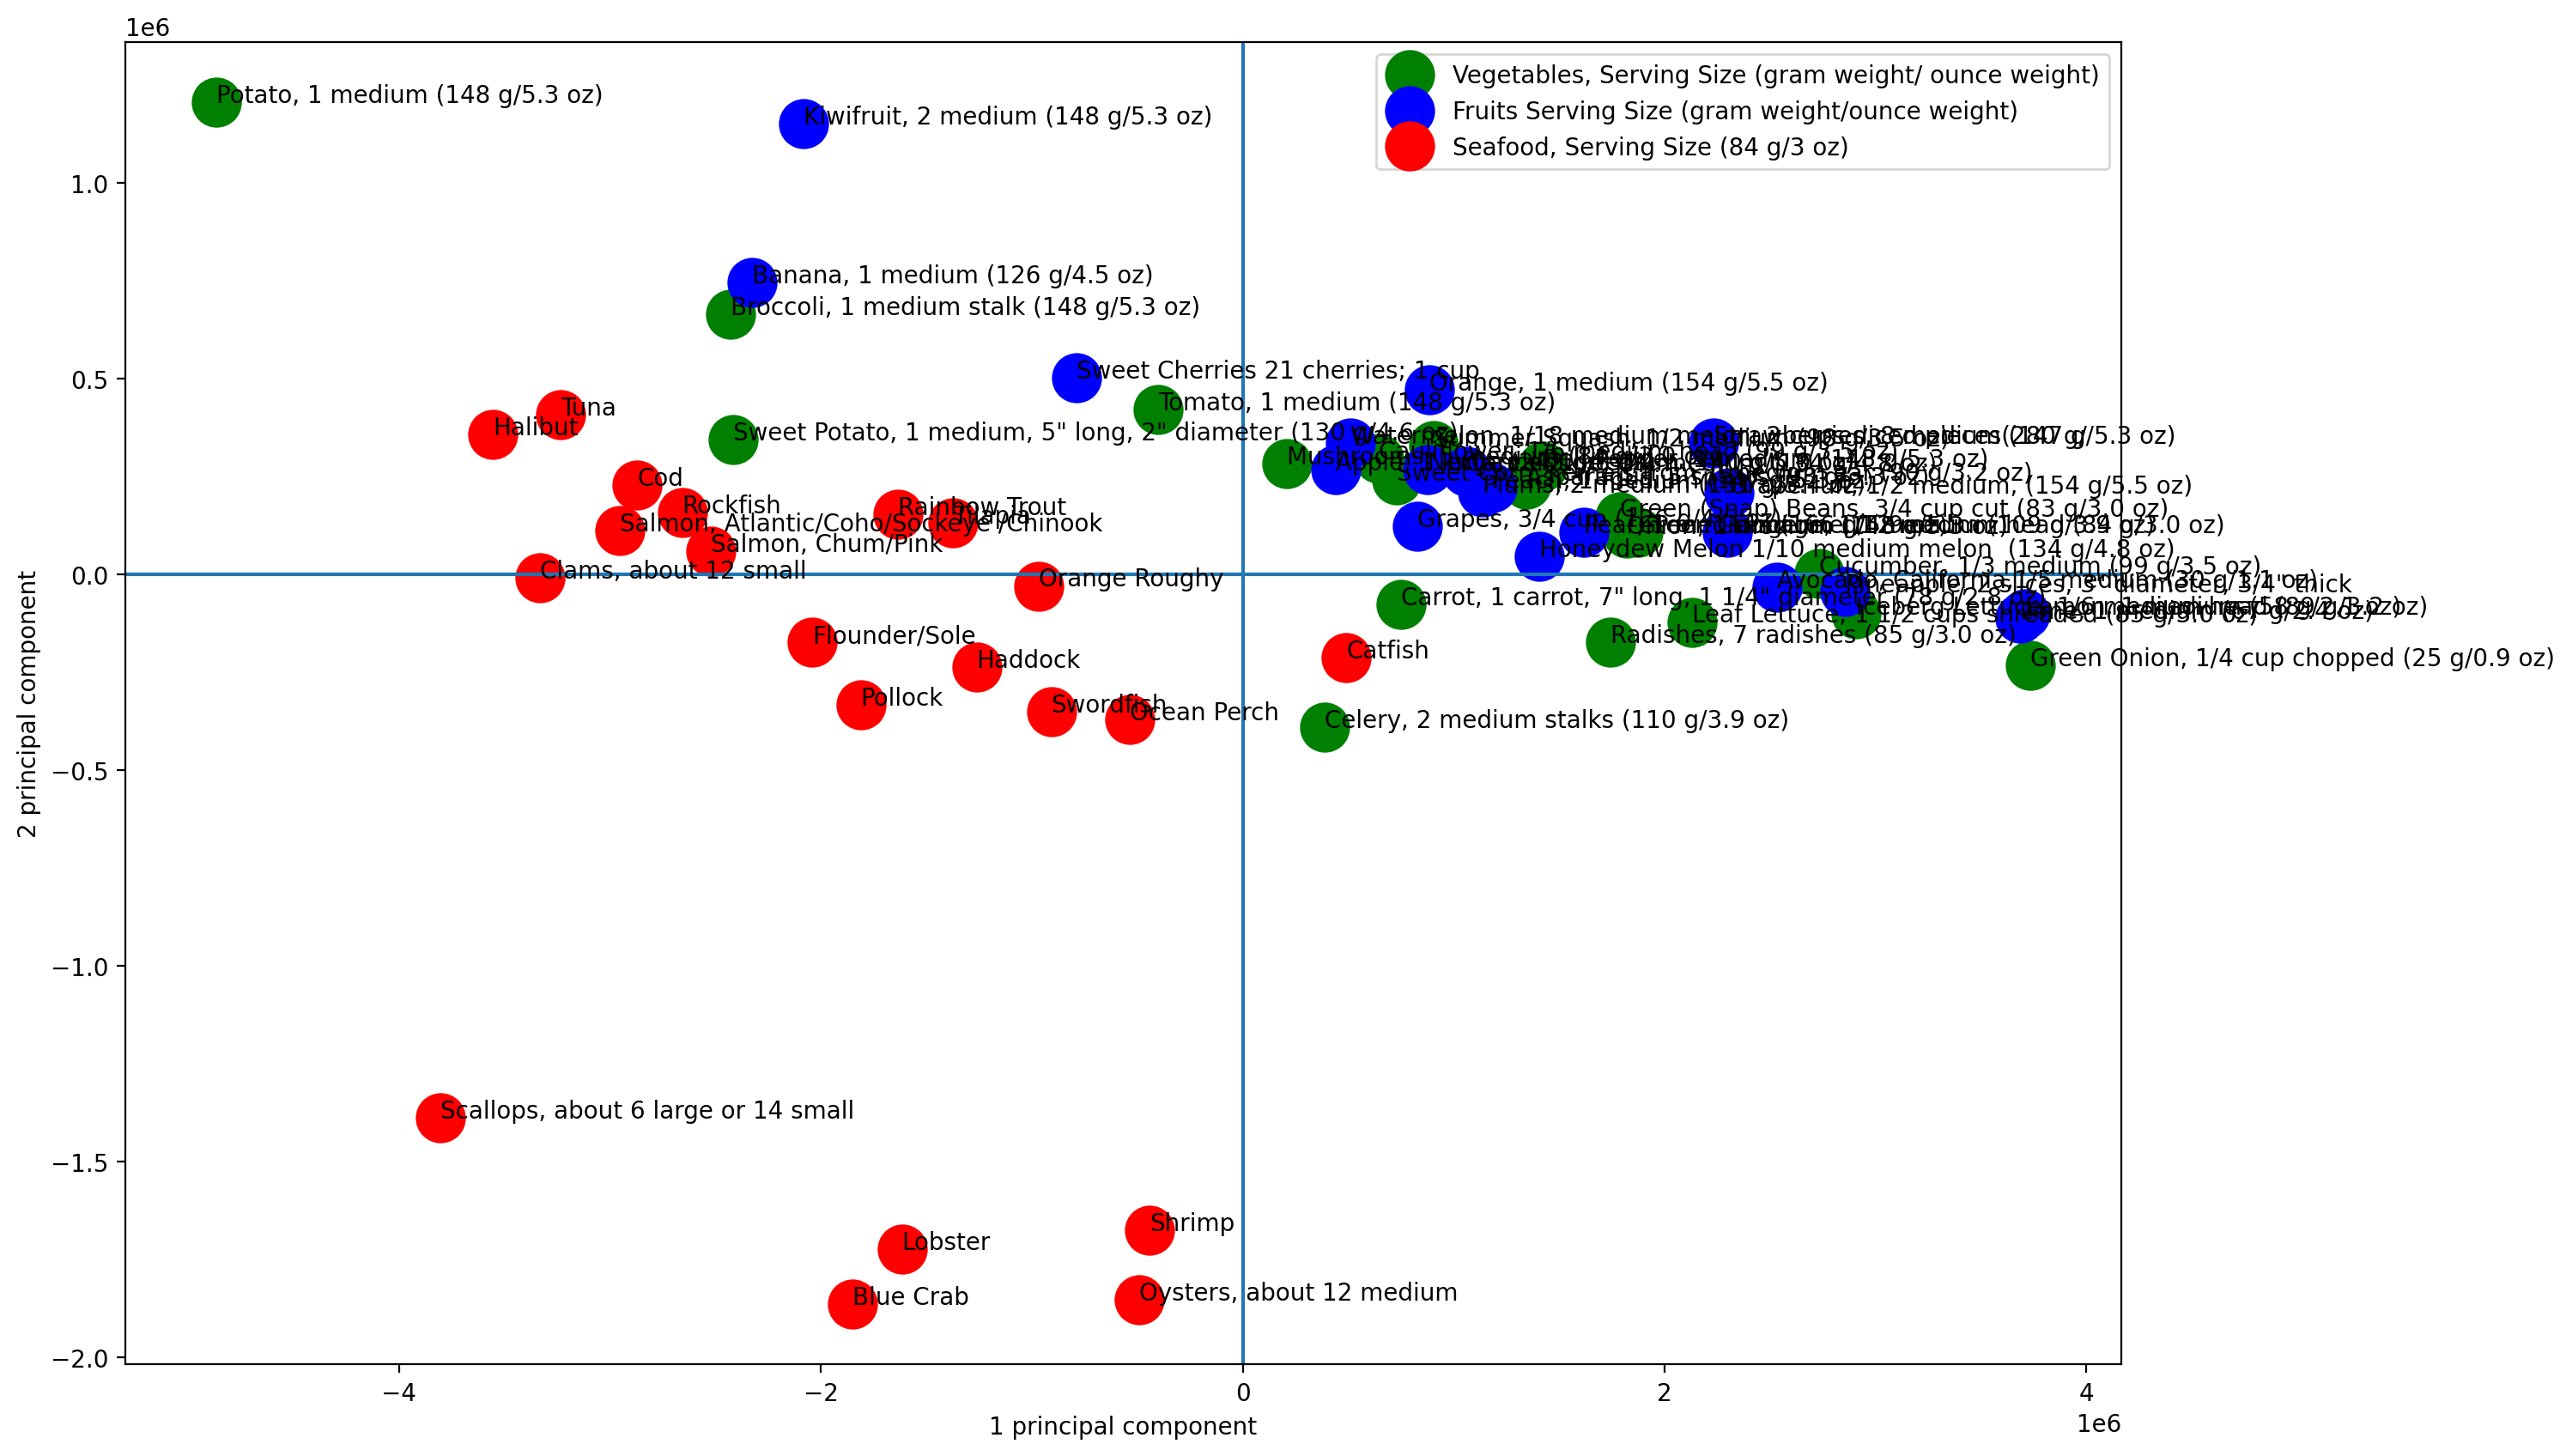

3 first dimensions


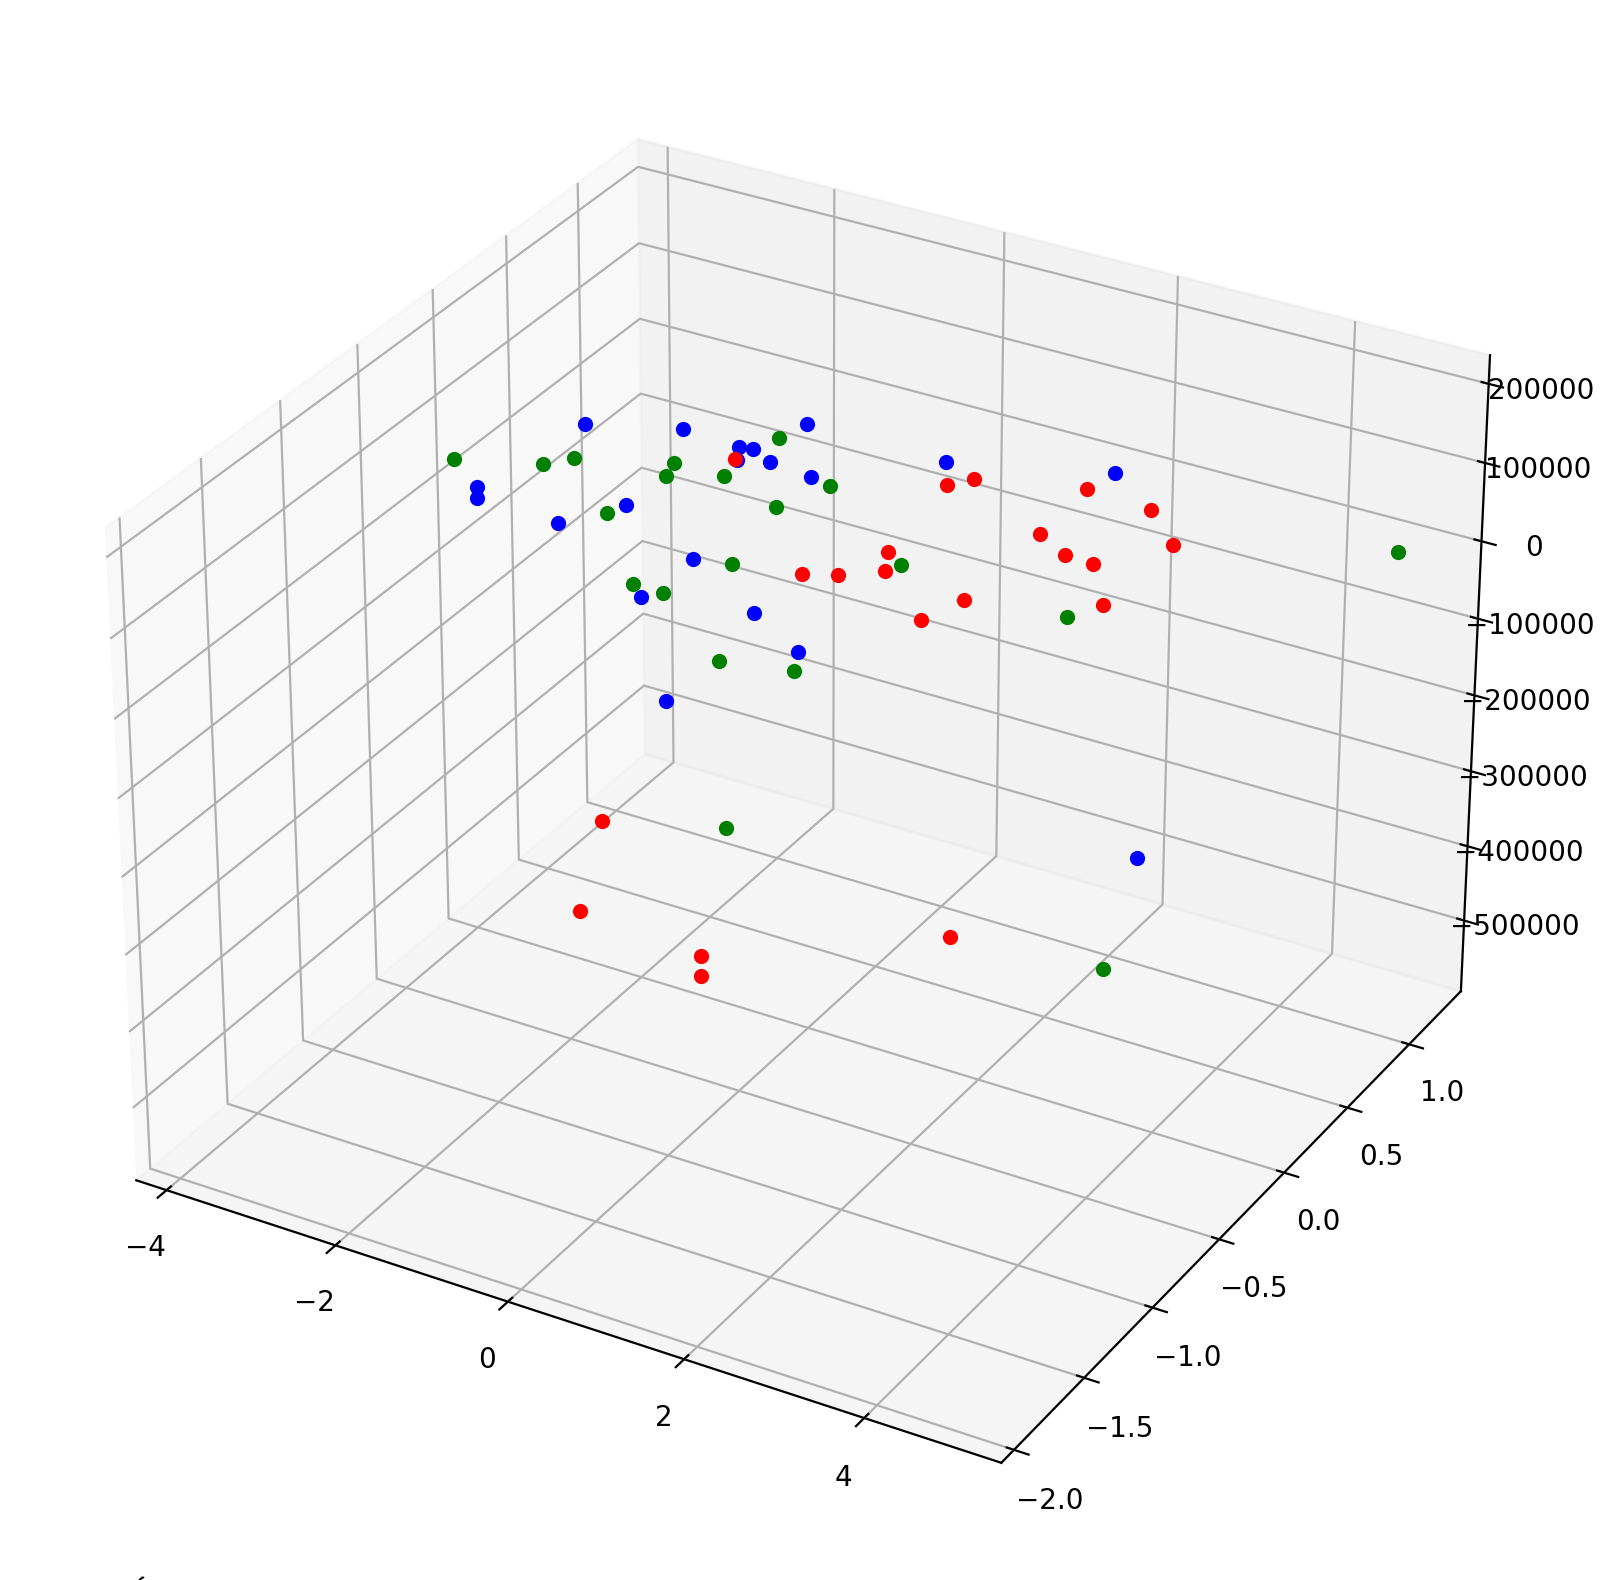

In [ ]:
k = 3

# this matrix has a size (items)x(k) and represent our food items in less-dimensional (k-dimensional) space
# in this new space the smaller the column index, the more valuable the component
W =  eigenvectors[:, :k] @ np.diag(eigenvalues)[:k,:k]
Ak = Ac @ W


print("2 first dimensions")
show_points_2d(-Ak.T[0], Ak.T[1], "1 principal component", "2 principal component")
print("3 first dimensions")
show_points_3d(Ak.T[0],Ak.T[1], Ak.T[2])

# OK THEN, BUT WHERE IS SVD?

We can use SVD instead of eigenvalue decomposition. It works because of
 **Eckart-Young-Mirsky theorem**

 ## Eckart-Young-Mirsky theorem

 Let $A \in R^{m \times n }$ and $A=USV^T$. Define $A_k$ as $A_k = \sum_{1}^k \sigma_i u_i v_i$. $A_k$ solves the optimization problem

 $$
 \min_{\texttt{B of rank k}} ||A - B||_2
 $$

 furthermore
 $$
 || A - A_k || = \sigma_{k+1}
 $$

In order to compute PCA via SVD:

1. Compute SVD for centered matrix A
2. Truncate $U$ and $\Sigma$ factors
3. Use the multiplication of $U$ and $\Sigma$ as k rank approximation of the initial matrix

In [ ]:
u, s, v = svd_(Ac)

2 first dimensions


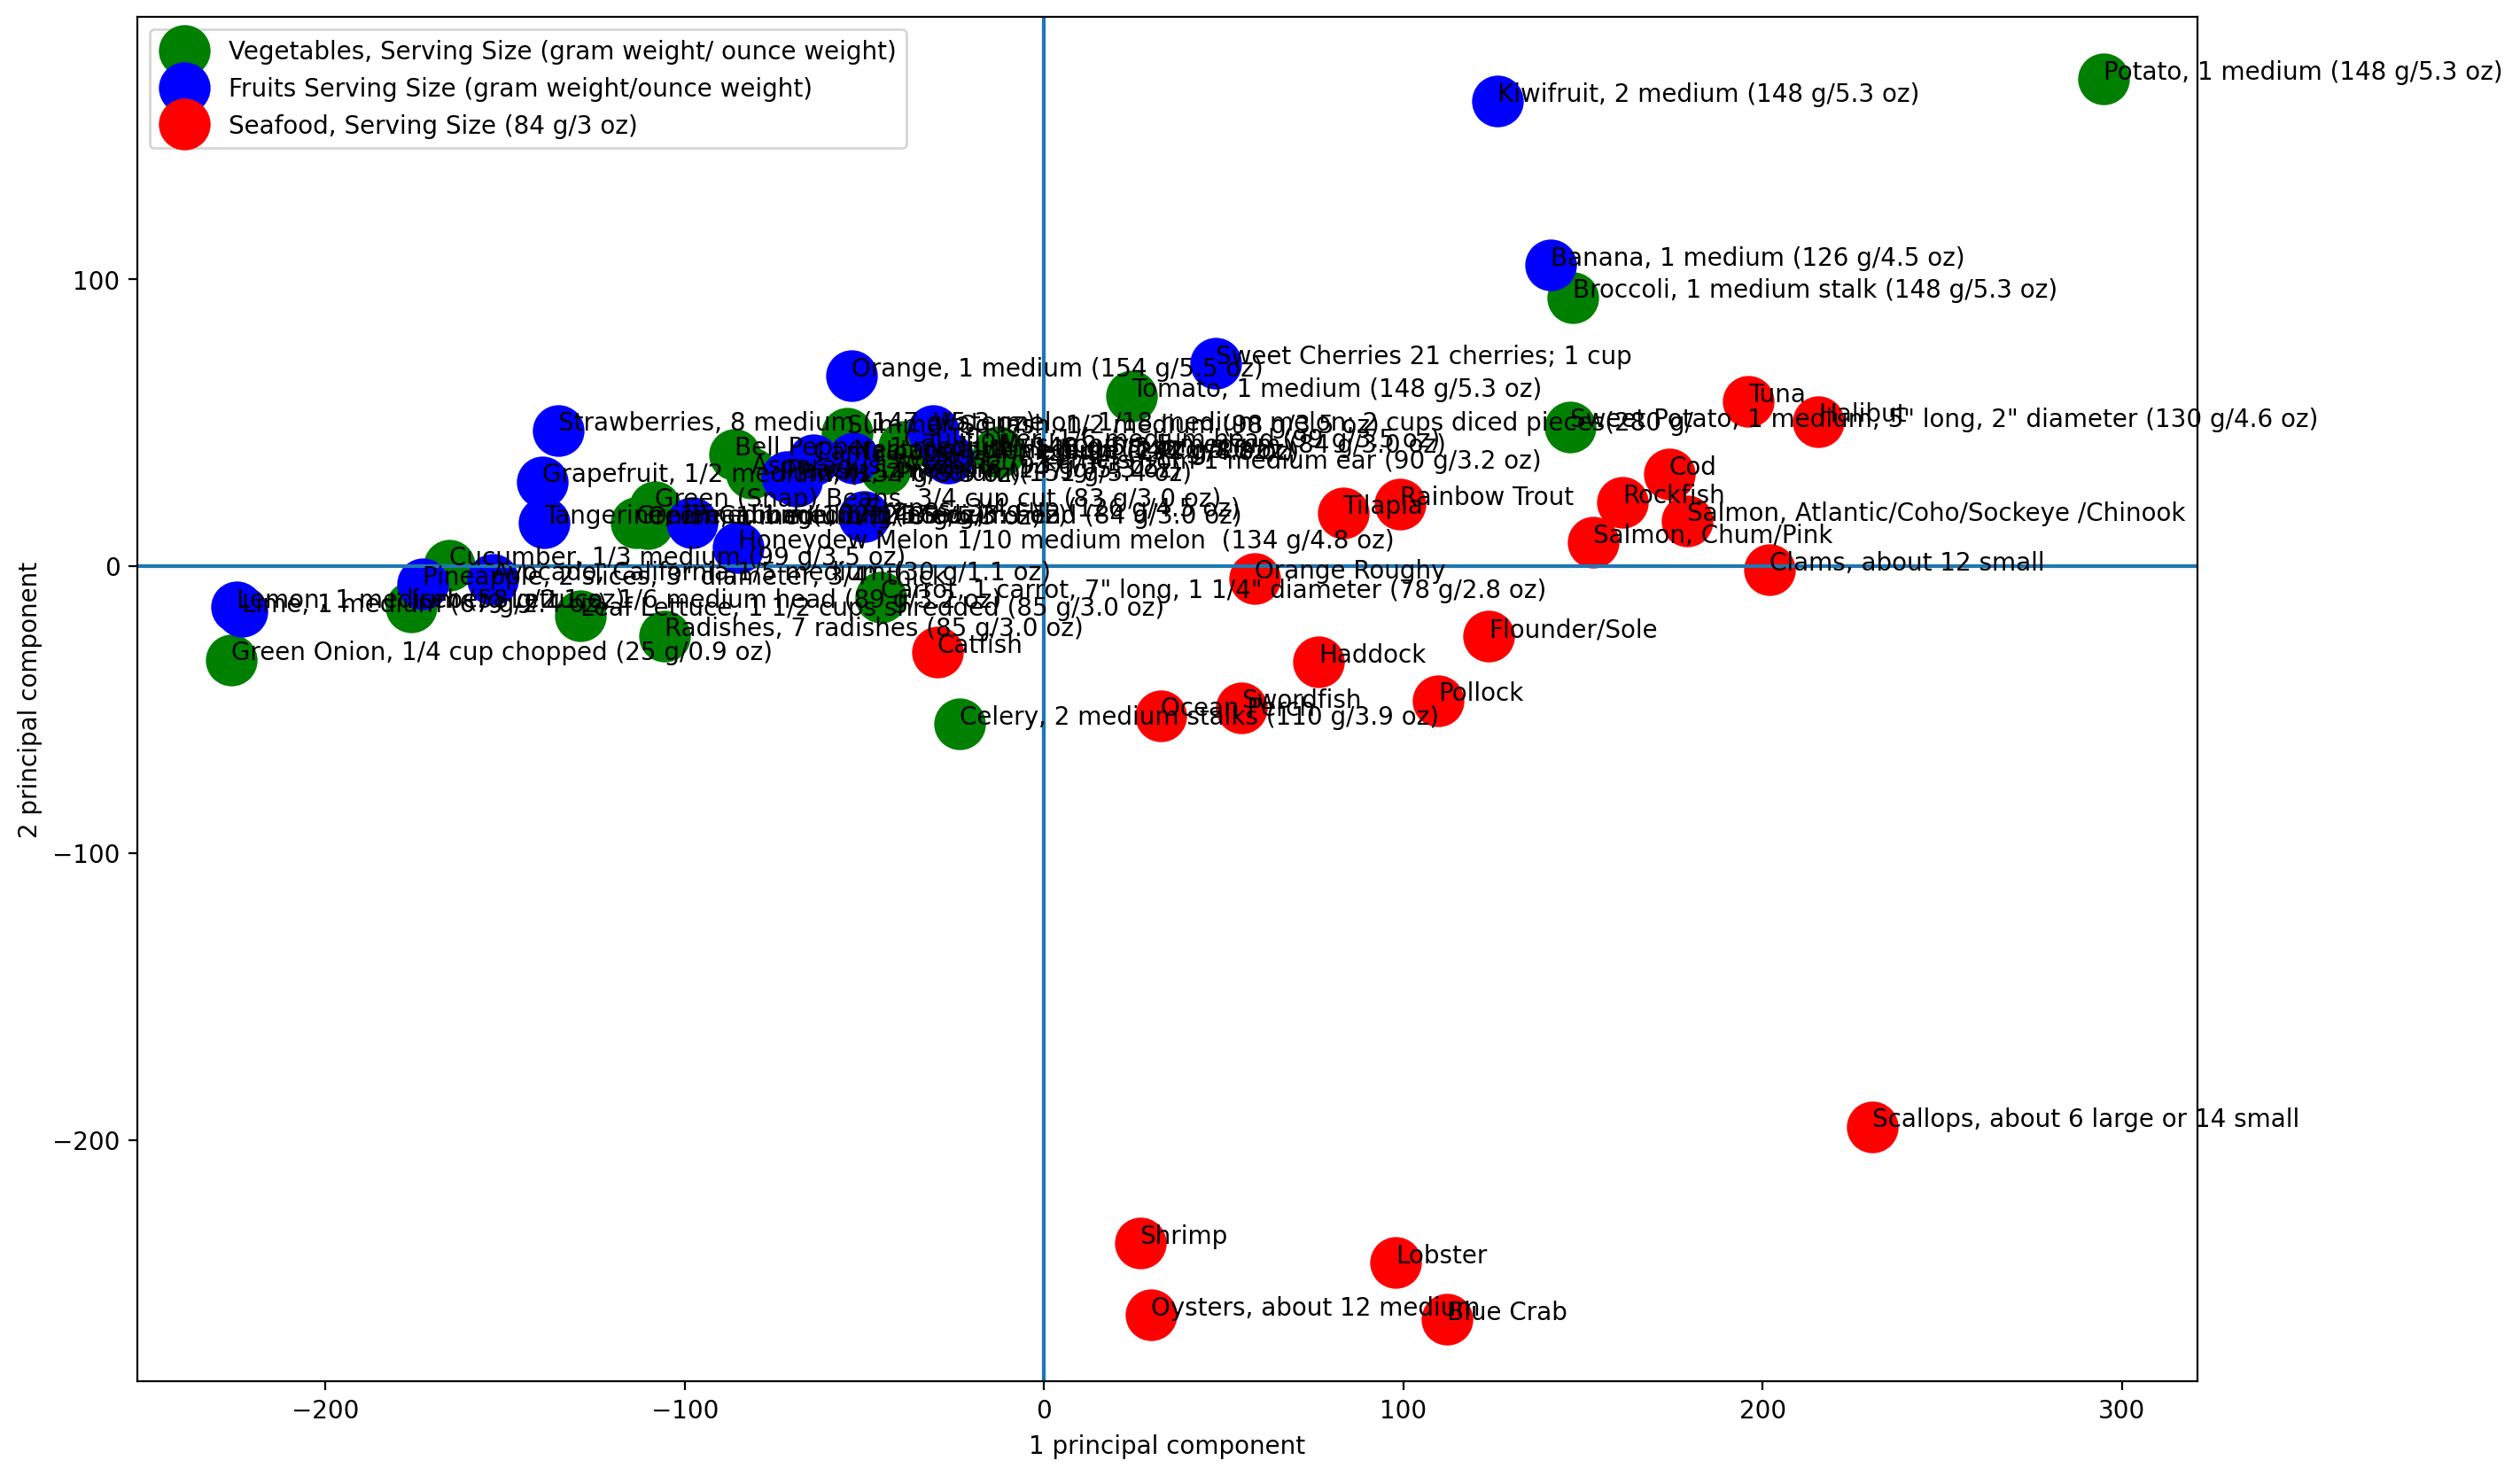

3 first dimensions


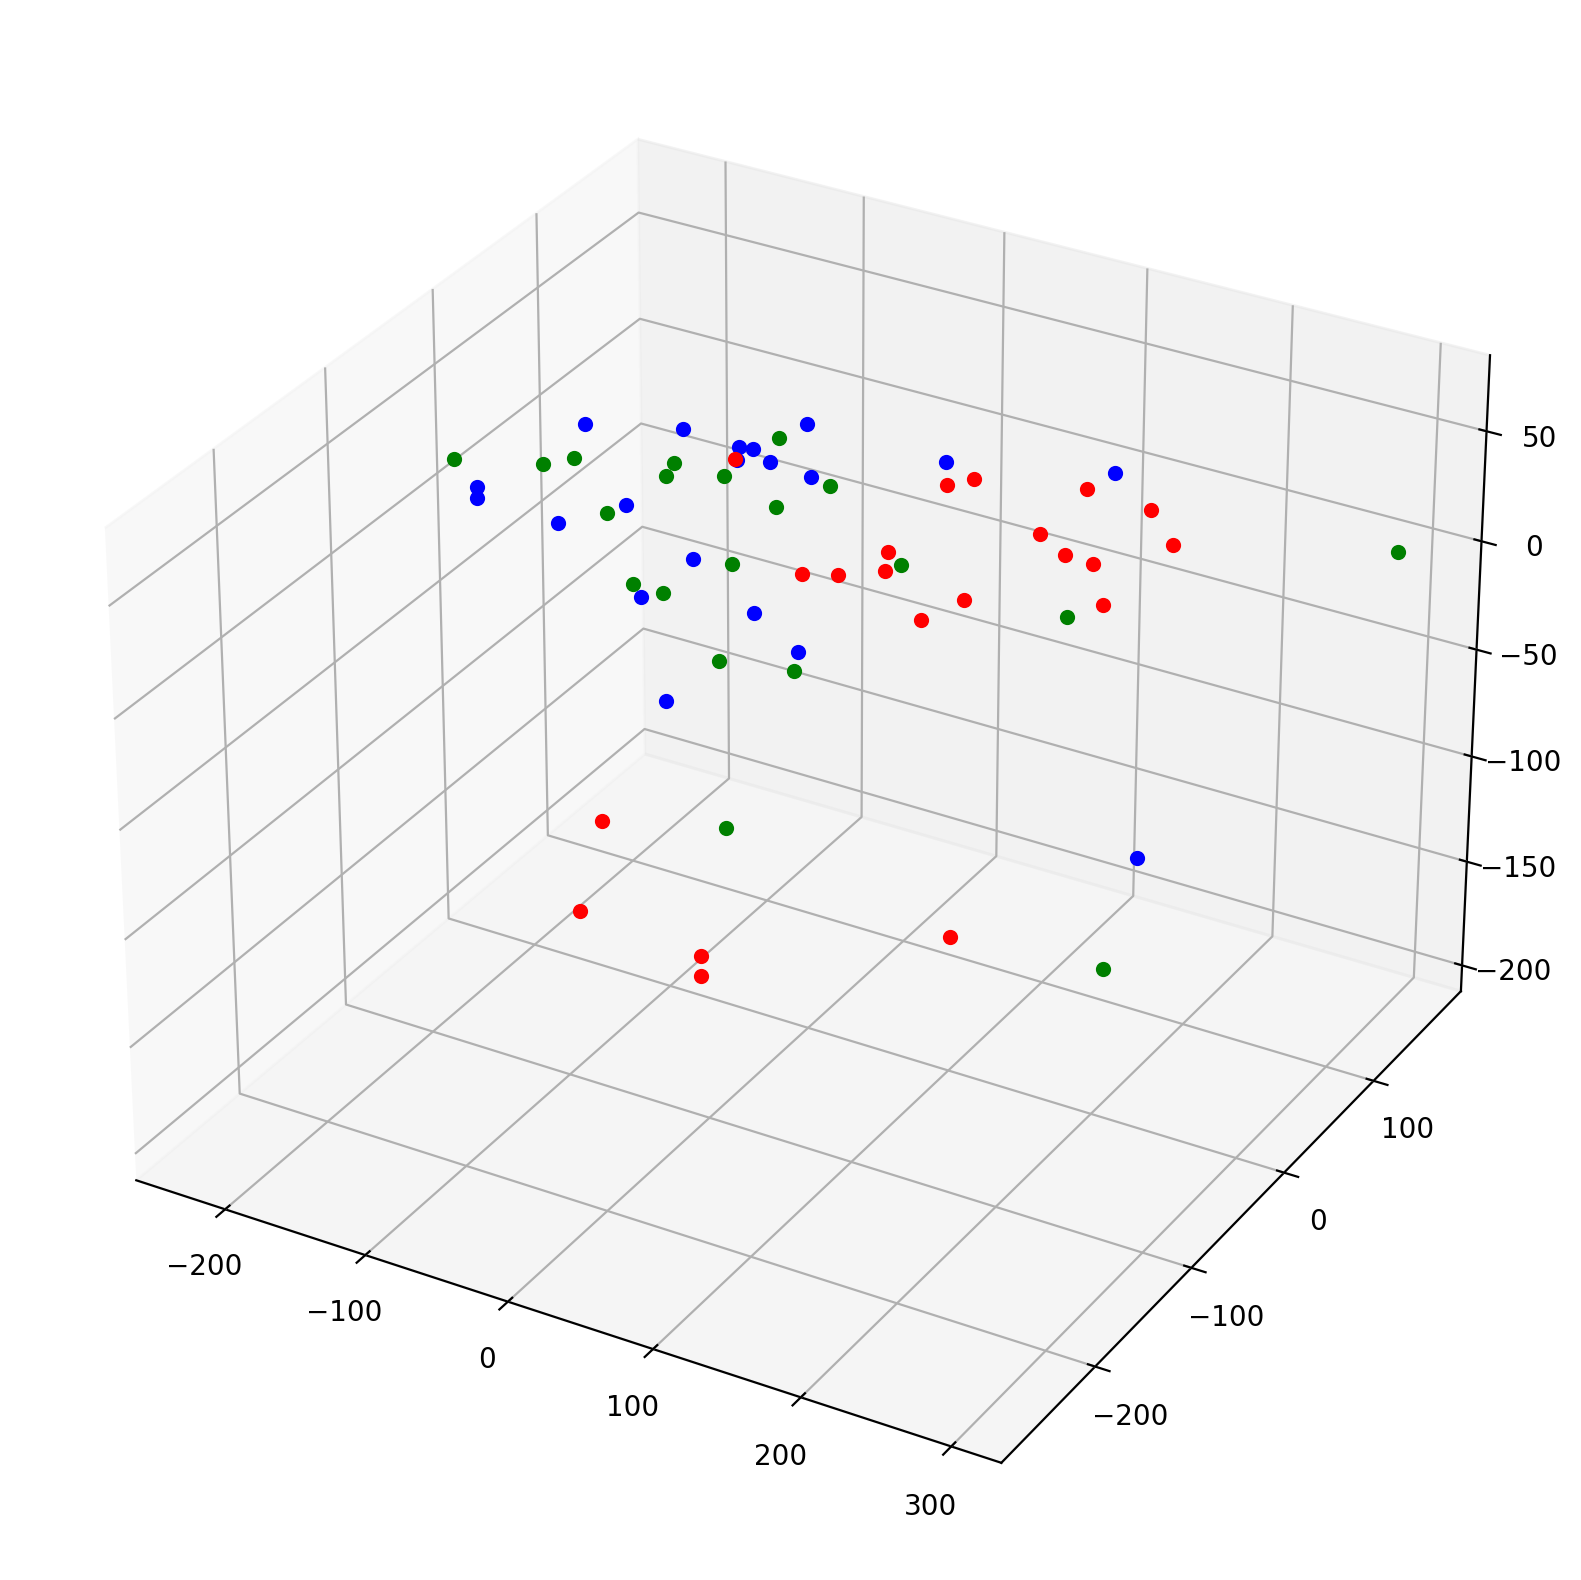

In [ ]:
k = 3

Ak =   u @ s[:, :k]

Ak = Ak.real



print("2 first dimensions")
show_points_2d(Ak.T[0], Ak.T[1], "1 principal component", "2 principal component")
print("3 first dimensions")
show_points_3d(Ak.T[0], Ak.T[1], Ak.T[2])

## PCA VIA SVD



$$
\overline{A} = U Σ V^{\top}
$$

$$
\overline{A}^{\top}\overline{A} = U \lambda(\overline{A}^{\top}\overline{A}) U^{\top}\\
\overline{A}\overline{A}^{\top} = V \lambda(\overline{A} \overline{A}^{\top}) V^{\top}\\
$$


Проекция данных на никую расзмерность будет такой:

$$
\overline{A} = U Σ V^{\top} \\
\overline{A} V[:, :k]  = U [:, :k] Σ [: k, :k]
$$

In [ ]:
u, s, v = np.linalg.svd(Ac, full_matrices=False)

In [ ]:
Ac @

In [ ]:
u.shape

(61, 22)

2 first dimensions


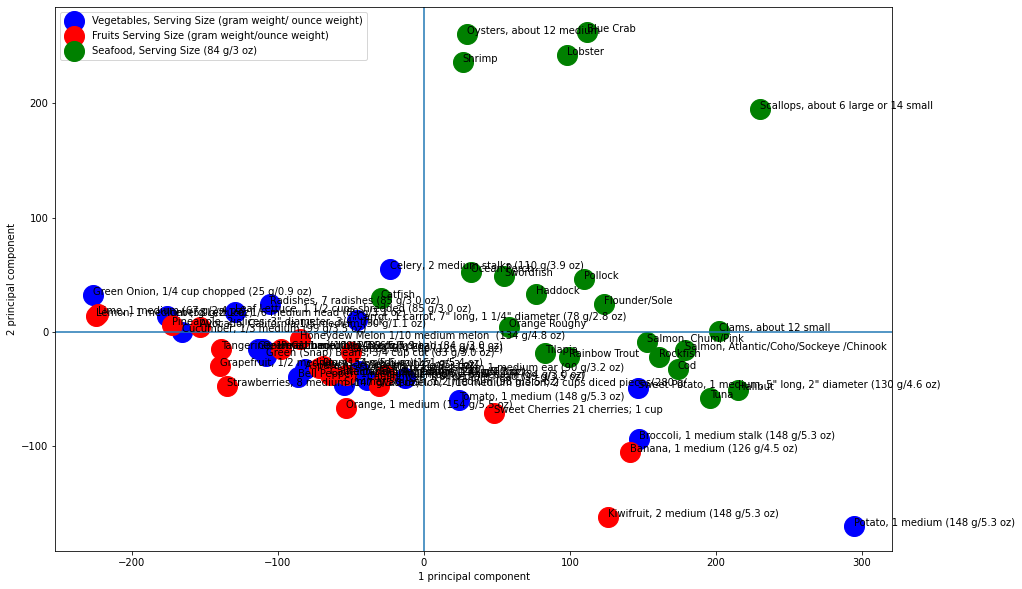

3 first dimensions


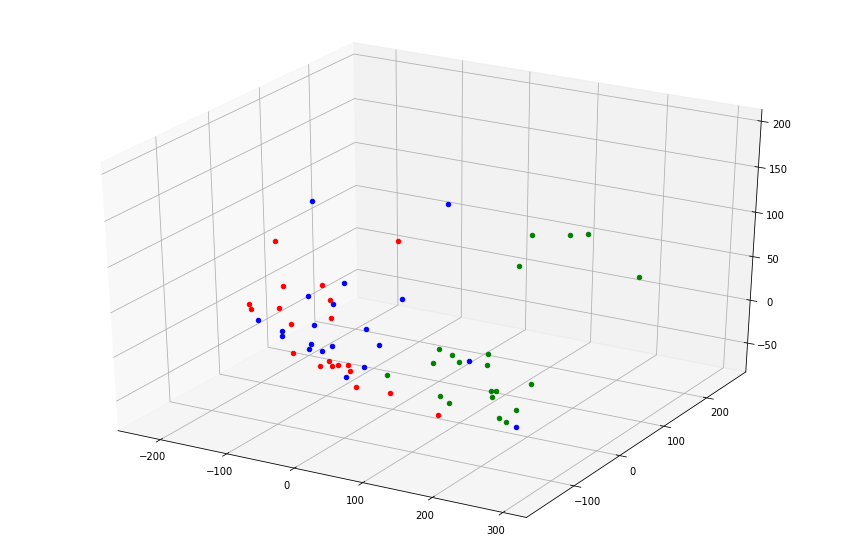

In [ ]:
k = 3

# this matrix has a size (items)x(k) and represent our food items in less-dimensional (k-dimensional) space
# in this new space the smaller the column index, the more valuable the component
Ak =   u[:, :k] @ np.diag(s[:k])



print("2 first dimensions")
show_points_2d(Ak.T[0], Ak.T[1], "1 principal component", "2 principal component")
print("3 first dimensions")
show_points_3d(Ak.T[0], Ak.T[1], Ak.T[2])